# Packaging et distribution de code Python


Dans ce guide, nous nous concentrerons sur les moyens de packager et d'expédier divers types de packages Python. Nous considérerons les applications complètes destinées aux utilisateurs finaux ainsi que les bibliothèques qui ne sont généralement utilisées que par les développeurs de logiciels. 

Tous ceux qui écrivent des logiciels le font pour une raison. Vous êtes peut-être un amateur qui crée des applications pour le plaisir et souhaite les partager avec des amis pour leur divertissement. Vous êtes peut-être un scientifique ou un chercheur qui résout un problème important et souhaite partager du code avec d'autres personnes pour leur faciliter la vie. Ou vous êtes peut-être un professionnel qui écrit du code pour gagner sa vie et vous souhaitez mettre votre application ou votre service à la disposition de clients payants.

 Chaque raison d'écrire du code est bonne, mais chacune a généralement sa propre façon de distribuer le logiciel. Dans ce guide, nous aborderons trois scénarios principaux :
 
* Packager et distribution de bibliothèque
* Pachager d'applications et de services pour le Web
* Création d'exécutables autonomes 

Dans un premier temps, nous nous concentrerons sur package et la distribution de bibliothèques car c'est le scénario qui peut prendre en charge le développement de autres flux de conditionnement et de distribution.


## Packaging et distribution de bibliothèques

Une bibliothèque de logiciels est un morceau de code réutilisable qui peut être utilisé comme composant d'une application plus importante ou d'une autre bibliothèque. 

Les bibliothèques se concentrent généralement sur la résolution d'ensembles limités de problèmes d'un domaine technique spécifique, mais il n'y a pas de limite pour la taille de la bibliothèque. Pour les besoins de ce guide, nous considérerons également les frameworks comme des bibliothèques. C'est parce que les frameworks peuvent également être compris comme des composants d'une application, bien qu'à une échelle plus large et plus générique. 

Les bibliothèques en Python sont distribuées sous la forme de packages (ou modules). Nous les avons déjà utilisés tout au long du repo. La plupart des packages que nous avons obtenus de PyPI dans les guide précédents peuvent en fait être considérés comme des bibliothèques. 

La plupart des bibliothèques Python open source sont distribuées via PyPI et c'est pourquoi nous aborderons ce sujet à travers le prisme de la distribution de packages open source. la source. Savoir comment créer vos propres packages vous donnera un meilleur aperçu de l'écosystème de l'emballage et vous aidera à travailler avec du code tiers disponible sur PyPI (que vous utilisez probablement déjà). 

Le package Python peut être un peu écrasant à et d'abord. La principale raison en est la confusion au sujet des outils appropriés pour créer des packages Python. Quoi qu'il en soit, une fois que vous aurez créé votre premier package, vous verrez que ce n'est pas aussi difficile qu'il n'y paraît. 

De plus, connaître des outils d'emballage appropriés et à la pointe de la technologie aide beaucoup.

Mais avant d'aborder les outils de pointe, examinons de plus près l'anatomie d'un package Python

## L'anatomie d'un package Python

La partie minimale distribuable du code Python est un module, qui est un fichier source unique se terminant par l'extension .py. Une collection de modules est appelée un package. Bien que vous puissiez théoriquement distribuer vos packages et modules Python sous forme de bundle de code source brut et permettre à vos utilisateurs de l'utiliser via l'interpréteur Python, ce serait vraiment problématique pour les personnes non techniques. 

Même les développeurs s'attendent à une certaine quantité d'empaquetage minimal qui leur permettrait d'installer votre application ou bibliothèque à l'aide d'outils d'empaquetage Python comme pip ou Poetry. Il existe plusieurs dispositions possibles de l'arborescence des sources pour un paquet Python qui doit être distribué sur PyPI. Il existe quelques modèles récurrents et presque chaque paquet a quelques fichiers communs. Il est difficile de dire quelle mise en page est la meilleure, alors considérons simplement la mise en page suivante, qui est la préférée des auteurs :

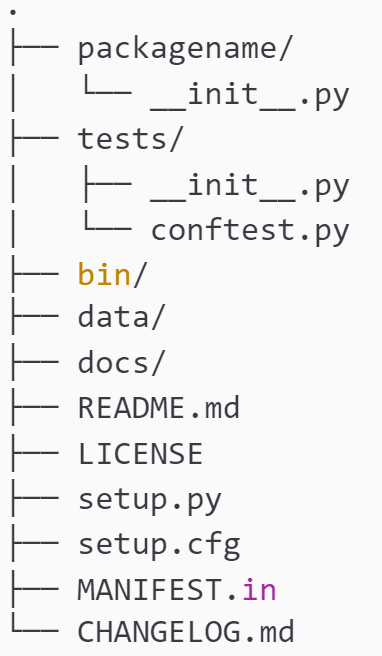

La structure principale des sources du projet est dictée par la disposition des sous-répertoires. Chacun a son propre rôle :

* packagename/ : c'est le répertoire contenant les sources Python du package. C'est le cœur de ce qui est distribué sur PyPI. De préférence, celui-ci a exactement le même nom que le nom sous lequel le package est enregistré sur PyPI, bien que de nombreux développeurs utilisent des tirets au lieu de traits de soulignement dans l'enregistrement PyPI. Habituellement, il n'y a qu'un seul package de niveau supérieur dans l'arborescence des sources

* tests/ : il s'agit du répertoire du package de test. Il contient des modules de test et (éventuellement) des sous-packages de test. Dans l'exemple ci-dessus, nous voyons le module conftest, qui est un module de test spécial du framework pytest qui contient généralement des fixtures de test et des plugins pytest facultatifs. Ce répertoire n'est généralement pas distribué sur PyPI car le nom des tests est assez courant et votre package de test entrerait probablement en conflit avec d'autres packages de test dans le répertoire site-packages après l'installation. Si vous souhaitez distribuer des tests avec votre package, vous devez l'espacer de noms en l'imbriquant dans le répertoire principal du package (ici, le répertoire packagename/).

* bin/ : il s'agit d'un répertoire pour les scripts shell et les utilitaires qui peuvent être utiles pour le développement de packages. Il peut contenir, par exemple, des scripts pour la construction de la documentation, des linters personnalisés ou des utilitaires facilitant le processus de distribution des packages. Ces scripts ne sont pas distribués sur PyPI

* data/ : il s'agit d'un répertoire pour les fichiers de données essentiels qui doivent être inclus dans la distribution du paquet. Un exemple pourrait être des modèles d'apprentissage automatique pré-entraînés, des images ou des fichiers de traduction.

* docs/ : il s'agit d'un répertoire pour la documentation des packages. La documentation peut prendre n'importe quelle forme, mais de nombreux développeurs utilisent des systèmes de création de documentation automatisés comme Sphinx ou MkDocs. Dans de tels cas, le répertoire docs/ contient les sources de documentation et la configuration pour ces systèmes mais pas les fichiers de documentation rendus. Ce répertoire n'est souvent pas distribué sur PyP


Les fichiers en dehors des répertoires ci-dessus fournissent généralement des outils de configuration ou contiennent des métadonnées du package. La mise en page suggérée répertorie six fichiers qui sont le minimum essentiel pour un package open-source :

* README.md : ce fichier contient une description minimale et/ou une documentation du package. L'extension .md désigne le langage de balisage Markdown, qui est un choix populaire auprès des développeurs. L'utilisation d'un langage de balisage dédié est entièrement facultative et les noms alternatifs courants pour ce fichier sont README ou README.txt. C'est une bonne pratique d'inclure ce fichier dans la distribution du paquet

* LICENCE : ce fichier contient une licence logicielle pour les utilisateurs du package. Il s'agit généralement d'un fichier en texte brut sans aucun langage de balisage spécifique. La distribution des packages doit inclure ce fichier.

* setup.py : il s'agit d'un script de distribution de packages Python. Il est utilisé pour créer des distributions de packages et les télécharger dans le registre de packages. Entre autres choses, il contient des métadonnées de package et des définitions d'extensions (si le package en fournit). Il n'est inclus que dans les distributions sources (nous en discuterons dans la section Types de distributions de packages). Il peut inclure des métadonnées de package et des options par défaut pour les sous-commandes du script setup.py. De nombreux outils de développement Python (frameworks de test, linters) utilisent également des sections dédiées dans ce fichier comme leur propre configuration.

* MANIFEST.in : c'est le fichier modèle pour le fichier manifest du package. Il peut être utilisé pour indiquer au script setup.py quels fichiers non sources doivent être inclus dans la distribution du package.

* CHANGELOG.md : il s'agit d'un fichier facultatif avec un journal de toutes les modifications apportées au package jusqu'à la version actuelle. C'est une bonne pratique de l'inclure dans la distribution du paquet. De courts journaux des modifications peuvent également être inclus dans le fichier README, bien que pour les projets avec des versions fréquentes, il soit généralement préférable d'avoir un fichier dédié à cette fin.

Certains de ces fichiers ont une syntaxe ou une structure très spécique, dont nous parlerons bientôt. Examinons de plus près le plus important : le script setup.py

## setup.py

Le répertoire racine d'un projet qui a un package Python distribuable contient un script setup.py. Il fournit des métadonnées de package essentielles telles que le numéro de version, la description, les auteurs, le type de licence ou la dépendance requise. Les métadonnées du package sont exprimées sous forme d'arguments pour la fonction setuptools.setup()

Par conséquent, le contenu minimum du fichier setup.py est le suivant

    from setuptools import setup  
    
    setup(     
      name='mypackage', )

Notez que l'utilisation d'un argument de nom est juste suffisant pour enregistrer le package dans le registre des packages, mais cela ne vous permet toujours pas de créer des distributions fonctionnelles. Afin de créer des distributions fonctionnelles, vous devrez fournir un peu plus de métadonnées qui permettront au package setuptools de collecter correctement les fichiers sources. Nous discuterons des entrées de métadonnées les plus importantes plus tard, dans la section Métadonnées du package essentiel


L'argument name définit le nom complet de la distribution du package. Si vous décidez de publier votre package dans un registre comme PyPI, il sera enregistré sous ce nom exact. À partir de là, le script fournit plusieurs commandes qui peuvent être répertoriées avec l'option --help-commands. Ce qui suit est un exemple de sortie.


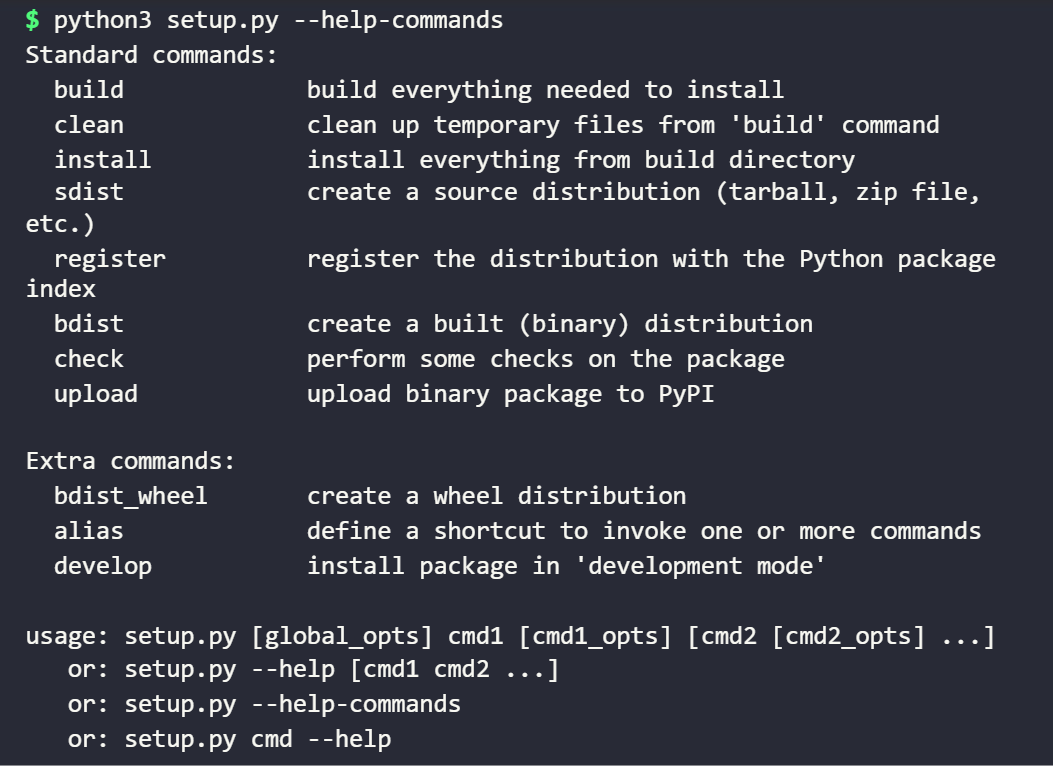

Les commandes standard sont les commandes intégrées fournies par distutils, tandis que les commandes supplémentaires sont celles fournies par des packages tiers, tels que setuptools ou tout autre package qui définit et enregistre une nouvelle commande. Ici, une telle commande supplémentaire enregistrée par un autre package est bdist_wheel, fournie par le package wheel

## setup.cfg

Le fichier setup.cfg contient des options par défaut pour les commandes du script setup.py. Ceci est très utile si le processus de construction et de distribution du package est plus complexe et nécessite de passer de nombreux arguments facultatifs aux commandes de script setup.py. Ce fichier setup.cfg vous permet de stocker ces paramètres par défaut avec votre code source projet par projet. Cela rendra votre flux de distribution lié au projet et fournira également une transparence sur la façon dont votre package a été construit/distribué aux utilisateurs ou aux membres de votre équipe. La syntaxe du fichier setup.cfg est la même que celle fournie par le module configparser, il est donc similaire aux fichiers INI Microsoft Windows populaires. Voici un exemple du fichier de configuration setup.cfg qui fournit des valeurs par défaut globales ainsi que des valeurs par défaut pour les commandes sdist et bdist_wheel

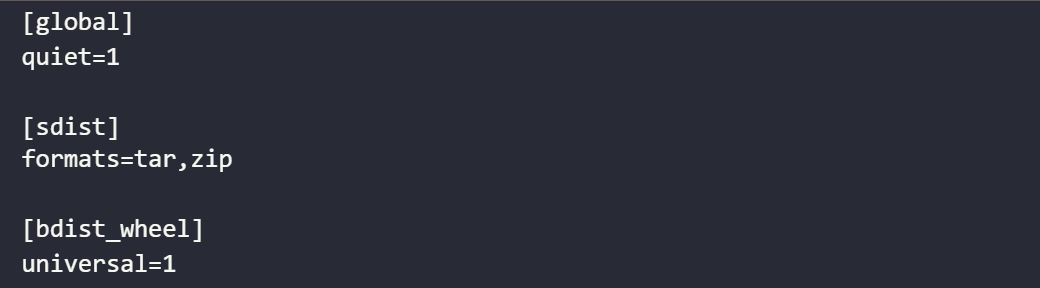

La configuration ci-dessus garantira que les distributions source (la section sdist) seront toujours créées dans deux formats (ZIP et TAR) et les distributions de roues construites (la section bdist_wheel) seront créées en tant que roues universelles indépendantes de la version Python . De plus, la plupart des sorties seront supprimées à chaque commande par le commutateur global --quiet

## MANIFEST.in

Lors de la création d'une distribution source avec la commande sdist, le module setuptools parcourt le répertoire du package à la recherche de fichiers à inclure dans l'archive. Par défaut, setuptools inclura les fichiers suivants basés sur les arguments de la fonction setup() :

* Tous les fichiers sources Python impliqués par les arguments py_modules et packages
* Tous les fichiers sources d'extension répertoriés dans l'argument ext_modules
* Tous les scripts spécifiés par l'argument scripts
* Tous les fichiers spécifiés par les arguments package_data et data_files
* La licence spécifiés par les arguments license_file et license_files
* Fichiers correspondant au modèle glob test/test*.py
* Fichiers nommés setup.py, pyproject.toml, setup.cfg et MANIFEST.in
* Fichiers nommés README, README.txt , README.rst et README.md


En plus de cela, si votre package est versionné avec un système de contrôle de version tel que Subversion, Mercurial ou Git, il est possible d'inclure automatiquement tous les fichiers contrôlés par version à l'aide d'extensions setuptools supplémentaires telles que setuptools-svn, setuptools-hg, et setuptools-git. L'intégration avec d'autres systèmes de contrôle de version est également possible via d'autres extensions personnalisées. 

Peu importe s'il utilise la stratégie de collecte de fichiers intégrée par défaut ou définie par une extension personnalisée, sdist créera un fichier MANIFEST qui répertorie tous les fichiers et l'inclura dans l'archive finale.Bien que les arguments de la fonction setup() vous permettent de lister tout type de fichier à inclure dans la distribution du paquet, les lister un par un peut ne pas être l'option la plus pratique. 

De plus, l'utilisation des extensions pour un système de contrôle de version spécifique peut capturer certains fichiers que vous ne souhaitez peut-être pas inclure dans votre distribution de paquet. Dans les deux cas, vous pouvez utiliser le modèle MANIFEST.in pour fournir un modèle de manifeste supplémentaire afin d'inclure ou d'exclure automatiquement les fichiers en fonction du modèle de nom de fichier. Disons que vous n'utilisez pas d'extensions supplémentaires et que vous devez inclure dans votre distribution du package certains fichiers qui ne sont pas capturés par défaut. Vous pouvez définir un modèle appelé MANIFEST.in dans le répertoire racine de votre package (le même répertoire que le fichier setup.py). Ce modèle dirige la commande sdist sur les fichiers à inclure. 

Le modèle MANIFEST.in définit une règle d'inclusion ou d'exclusion par ligne. Ce qui suit est un exemple du modèle MANIFEST.in qui permet l'inclusion du fichier LICENSE, des informations textuelles supplémentaires trouvées dans les fichiers .txt et tous les fichiers au format Markdown


    include HISTORY.txt 
    include README.txt 
    include CHANGES.txt 
    include CONTRIBUTORS.txt 
    include LICENSE 
    recursive-include *.md



## Métadonnées essentielles du package 

L'argument le plus important de la fonction setup() est le nom. Sans cela, le package setuptools prendra le nom UNKNOWN, ce qui ne vous permettra pas de distinguer facilement les différentes distributions de packages. 

Utiliser uniquement l'argument name n'est bien sûr pas suffisant pour fournir un emballage approprié et fonctionnel pour votre code. Les arguments les plus importants que la fonction setup() peut recevoir sont les suivants :

* version : il s'agit du spécier de la version actuelle du package.

* description : ceci inclut une brève description du package. Il s'agit généralement d'une phrase qui explique l'objectif du package.
* long_description : cela inclut une description complète qui peut être en reStructuredText (par défaut) ou dans d'autres langages de balisage pris en charge.

* long_description_content_type : cela définit le type MIME de la description longue ; il est utilisé pour indiquer au référentiel de packages quel type de langage de balisage est utilisé pour la description du package.

* keywords : il s'agit d'une liste de mots-clés qui définissent le package et permettent une meilleure indexation dans le référentiel de packages.
* auteur : c'est le nom de l'auteur du package ou de l'organisation qui s'en occupe.
* author_email : Il s'agit de l'adresse e-mail de contact de l'auteur du package.
*  install_requires : Ceci répertorie les packages et leurs versions qui sont des dépendances requises de votre package. Par exemple, si votre package nécessite d'autres packages disponibles sur PyPI pour fonctionner, vous mettez leurs noms (et leurs exigences de version) ici.
* url : Il s'agit de l'URL du projet. Il s'agit souvent de l'URL du site où sont hébergées les sources et/ou la documentation du projet.
* licence : c'est le nom de la licence (GPL, LGPL, etc.) sous laquelle le package est distribué.

* py_modules : une liste de Modules Python à inclure dans la distribution. Il peut être utilisé pour des projets simples qui n'ont que des modules de niveau supérieur qui ne partagent pas un espace de noms de package commun

* packages : il s'agit d'une liste de tous les noms de packages dans la distribution de packages ; setuptools() fournit une fonction utile appelée find_packages() qui peut automatiquement trouver les noms de packages à inclure. 

* namespace_packages : c'est une liste de packages d'espaces de noms dans une distribution de package


Les arguments ci-dessus sont des entrées de métadonnées essentielles qui vous permettront de construire correctement des distributions de packages mais également de vous attribuer votre code. Faites attention aux informations de licence et à toutes les adresses (e-mail et URL) qui permettront aux utilisateurs d'obtenir plus d'informations sur votre package et les conditions d'utilisation ou de vous contacter pour obtenir de l'aide


L'un des arguments importants mais non essentiels est celui des classifers. Il vous permet de catégoriser votre application à l'aide d'un ensemble standardisé de catégories de logiciels appelés trove classifiers. Cette fonctionnalité est particulièrement utile si vous souhaitez publier votre application sur PyPI. Regardons-le de plus près

## trove classifiers


PyPI fournit une solution pour catégoriser les applications avec l'ensemble de classificateurs appelés classificateurs trove. Tous les classificateurs de trove forment une structure arborescente. Chaque chaîne de classificateur définit une liste d'espaces de noms imbriqués où chaque espace de noms est séparé par la sous-chaîne ::. Leur liste est fournie à la définition du package en tant qu'argument classificateurs de la fonction setup(). 

Voici un exemple de liste de classificateurs tiré du projet solrq disponible sur PyPI



In [ ]:
from setuptools import setup  

setup(     
    name="solrq",     
    # (...)      
    classifiers=[         
                 'Development Status :: 4 - Beta',         
                 'Intended Audience :: Developers',         
                 'License :: OSI Approved :: BSD License',         
                 'Operating System :: OS Independent',         
                 'Programming Language :: Python',
                 'Programming Language :: Python :: 2',         
                 'Programming Language :: Python :: 2.6',         
                 'Programming Language :: Python :: 2.7',         
                 'Programming Language :: Python :: 3',         
                 'Programming Language :: Python :: 3.2',         
                 'Programming Language :: Python :: 3.3',         
                 'Programming Language :: Python :: 3.4',         
                 'Programming Language :: Python :: Implementation :: PyPy',         
                 'Topic :: Internet :: WWW/HTTP :: Indexing/Search',     
                 ], 
      )

Les classificateurs Trove sont complètement facultatifs dans la définition du package mais fournissent une extension utile aux métadonnées de base disponibles dans l'interface setup(). Entre autres, les classificateurs trove peuvent fournir des informations sur les versions Python prises en charge, les systèmes d'exploitation pris en charge, l'étape de développement du projet ou la licence sous laquelle le code est publié. De nombreux utilisateurs de PyPI recherchent et parcourent les packages disponibles par catégories afin qu'une classification appropriée aide les packages à atteindre leur cible. 

Les classificateurs Trove jouent un rôle important dans l'ensemble de l'écosystème de l'emballage et ne doivent jamais être ignorés. Il n'y a aucune organisation qui vérifie la classification des packages, il est donc de votre responsabilité de fournir des classeurs appropriés pour vos packages et de ne pas introduire de chaos dans l'ensemble de l'index des packages. 

Au moment de la rédaction de ce guide, il existe 756 classifications. disponibles sur PyPI qui sont regroupés dans les catégories principales suivantes :

* Development status
* Environment
*  Framework
*  Intended audience
*  License
*  Natural language
*  Operating system
*  Programming language
*  Topic
*  Typing


Cette liste ne cesse de s'allonger et de nouveaux classeurs sont ajoutés de temps à autre. Il est donc possible que le nombre total d'entre eux soit différent au moment où vous lisez ceci. La liste complète des classificateurs trove actuellement disponibles est disponible sur https://pypi.org/classifiers/ et peut être consultée en code Python via le package trove-classifiers disponible sur https://github.com/pypa/trove- classificateurs. Nous savons quelle est l'anatomie typique d'un package Python. Il est maintenant temps de discuter des différents types de distributions de packages pris en charge par les outils d'emballage Python standard

## Types de distributions de packages 

La distribution de packages est un artefact de package qui encapsule les sources de packages Python, les métadonnées et tous les fichiers supplémentaires dans une archive à fichier unique qui peut être distribuée à d'autres développeurs sous forme brute ou via le référentiel de packages. 

Il y a généralement deux types de distributions pour les packages Python :

*  Distributions sources
* Distributions construites (binaires) 

Les distributions sources sont les plus simples et les plus indépendantes de la plate-forme. Pour les packages Python purs, c'est une évidence. Une telle distribution ne contient que des sources Python, et celles-ci devraient déjà être hautement portables. 

Une situation plus complexe est lorsque votre package introduit des extensions écrites, par exemple, en C. Les distributions sources fonctionneront toujours à condition que l'utilisateur du package dispose de la chaîne d'outils de développement appropriée. dans leur environnement. Il s'agit principalement du compilateur et des fichiers d'en-tête C appropriés. Pour de tels cas, le format de distribution construit peut être mieux adapté car il peut fournir des extensions déjà construites pour des plates-formes spécifiques. 

La création de distributions source est gérée par la commande sdist du script setup.py. C'est pourquoi elles sont aussi communément appelées distributions sdist. Ce sont les plus faciles à créer, alors examinons-les d'abord.

## Distributions sdist

La commande sdist est la plus simple des commandes de distribution de script setup.py. Il crée une arborescence de versions et copie tout ce qui est nécessaire pour y exécuter le package. Cet arbre est ensuite archivé dans un ou plusieurs fichiers d'archive (souvent, il ne crée qu'une seule archive tar). L'archive est essentiellement une copie de l'arborescence source.


Cette commande est le moyen le plus simple de distribuer un package qui serait indépendant du système cible. Il crée un répertoire dist/ pour stocker les archives à distribuer. Avant de créer la première distribution, vous devez fournir un appel setup() avec un numéro de version. Si vous ne le faites pas, le module setuptools prendra la valeur par défaut de 0.0.0. Pour voir comment cela fonctionne en action, considérons l'exemple suivant du script setup.py

    from setuptools import setup  
    
    setup(name='acme.sql', version='0.1.1')

Exécutons maintenant la commande sdist pour le package acme.sql dans la version 0.1.1 :

    python setup.py sdist

Vous devriez voir la sortie suivante

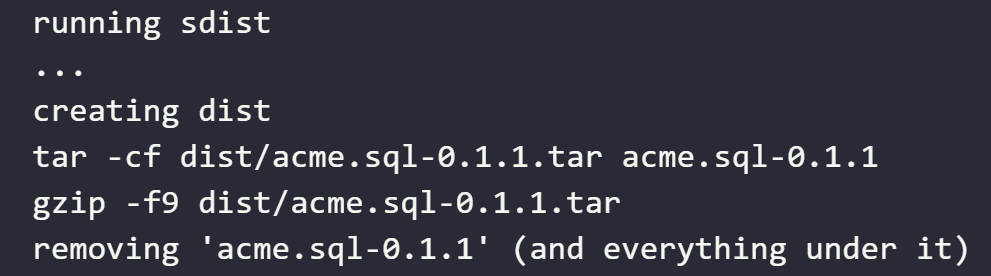

Si nous listons maintenant le contenu du répertoire dist/, nous devrions voir la sortie suivante
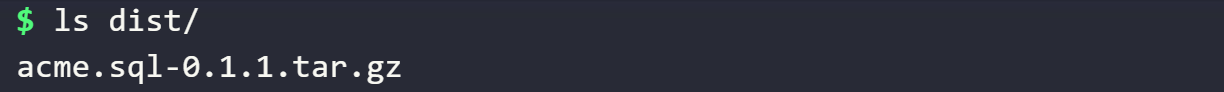

Le spécificateur de version est utilisé dans le nom de l'archive. Désormais, l'archive peut être distribuée et installée sur n'importe quel système doté de Python. Dans la distribution sdist, si le paquet contient des bibliothèques ou des extensions C, le système cible est responsable de leur compilation. Ceci est très courant pour les systèmes basés sur Linux ou macOS car ils fournissent généralement un compilateur. Mais il est moins courant de le faire fonctionner immédiatement sous Windows.

Si un package avec des extensions est destiné à être utilisé sur plusieurs plates-formes, il doit toujours être également distribué avec un format de distribution prédéfini. Les distributions prédéfinies sont créées avec un ensemble différent de commandes de script setup.py. Jetons un coup d'oeil à eux

## Distributions bdist et wheel

Pour pouvoir distribuer une distribution préconstruite, setuptools fournit la commande build. Cette commande compile le package en quatre étapes : 

* build_py : cela crée des modules Python purs en les compilant par octets et en les copiant dans le dossier de construction. 
* build_clib : cela crée des bibliothèques C, lorsque le package en contient, à l'aide du compilateur Python et créer une bibliothèque statique dans le dossier de construction.
*  build_ext : Cela crée des extensions C et place le résultat dans le dossier de construction comme build_clib.
* build_scripts : Cela crée les modules qui sont marqués comme des scripts. Il modifie également le chemin de l'interpréteur lorsque la première ligne a été définie (en utilisant le préfixe !#) et fixe le mode de fichier afin qu'il soit exécutable.


Chacune de ces étapes est une commande qui peut également être invoquée indépendamment. Le résultat du processus de compilation est un dossier build/ qui contient tout le nécessaire pour que le package soit installé. Il n'y a pas d'option de compilation croisée dans le package setuptools. Cela signifie que le résultat de la commande est toujours spécifique au système sur lequel elle a été construite. 

Lorsque certaines extensions C doivent être créées, le processus de construction utilise le compilateur système par défaut et le fichier d'en-tête Python (Python.h). Pour une distribution Python packagée, un package système supplémentaire pour votre distribution système est probablement requis. Au moins dans les distributions Linux populaires, il est souvent nommé python-dev ou python3-dev. Il contient tous les fichiers d'en-tête nécessaires à la création d'extensions Python. 

Le compilateur C utilisé dans le processus de création est le compilateur par défaut pour votre système d'exploitation. Pour un système basé sur Linux ou macOS, ce serait respectivement gcc ou clang. Pour Windows, Microsoft Visual C++ peut être utilisé (une version en ligne de commande gratuite est disponible)
. Le projet open source MinGW peut également être utilisé. Le choix du compilateur peut également être configuré via setuptools. 

La commande build est utilisée par la commande bdist pour construire une distribution binaire. Il appelle build et toutes les commandes dépendantes, puis crée une archive de la même manière que sdist.


Créons une distribution binaire pour acme.sql comme suit:

    python setup.py bdist

S'il est exécuté sur macOS, le résultat peut être le suivant:

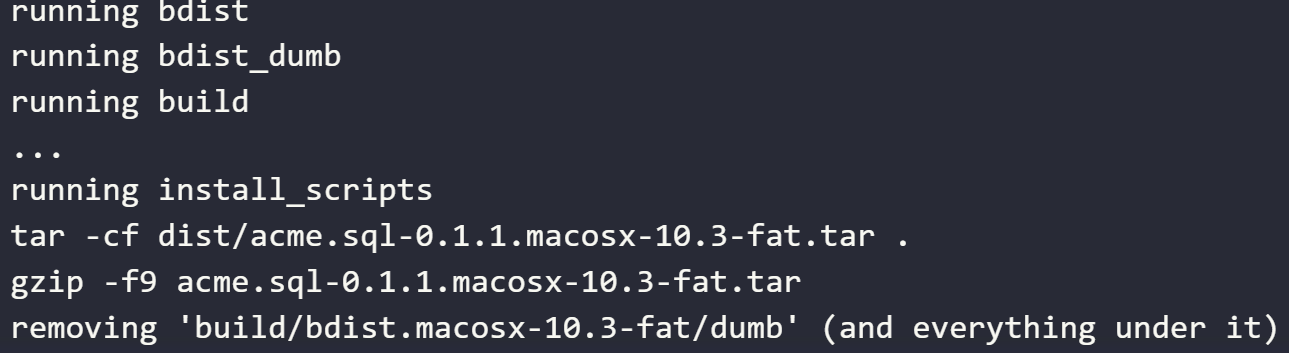

Si nous listons maintenant le contenu du répertoire dist/, nous devrions voir la sortie suivante:
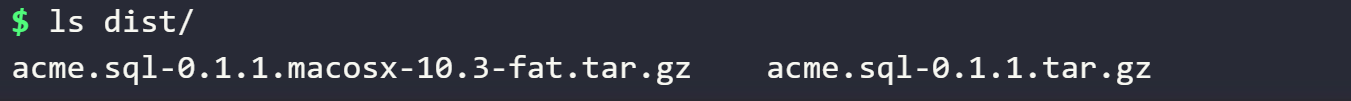

Notez que le nom de l'archive nouvellement créée contient le nom du système et la distribution sur laquelle il a été construit (macOS 10.3). La même commande invoquée sous Windows créera une autre archive de distribution spécifique au système

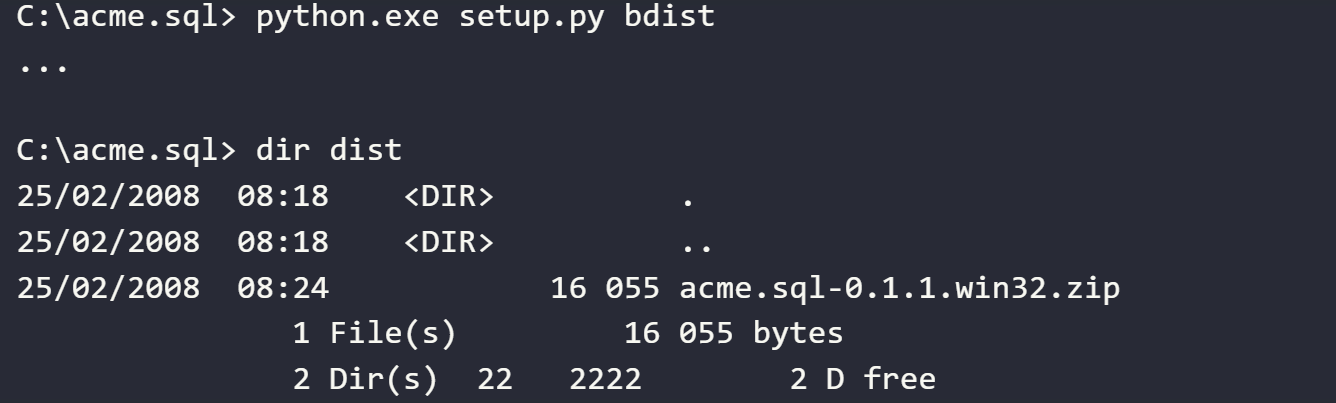

Une version binaire contient toutes les ressources nécessaires pour utiliser le package sur le système prévu. Il contient principalement un dossier qui est copié dans le dossier site-packages de Python. Il peut également contenir des fichiers de bytecode mis en cache (les fichiers __pycache__/*.pyc). 


Lorsqu'il est installé (par exemple, à l'aide de pip), le package wheel ajoute une nouvelle commande bdist_wheel au script setup.py. Il permet la création de distributions spécifiques à la plate-forme (actuellement uniquement pour Windows, macOS et Linux) qui sont de meilleures alternatives aux distributions bdist normales. Il a été conçu pour remplacer un autre format de distribution introduit précédemment par setuptools, appelé egg. eggs sont désormais obsolètes, ils ne seront donc pas présentés dans ce guide. La liste des avantages de l'utilisation des roues est assez longue. Voici ceux qui sont mentionnés sur la page Python Wheels disponible à l'adresse http://pythonwheels.com/ :

* Installation plus rapide pour les packages d'extension Python purs et C natifs.
* Évite l'exécution de code arbitraire pour l'installation (évite setup.py).
* L'installation d'une extension C ne nécessite pas de compilateur sous Windows, macOS ou Linux.
* Permet une meilleure mise en cache pour les tests et l'intégration continue.
* Crée des fichiers .pyc dans le cadre de l'installation pour s'assurer qu'ils correspondent à l'interpréteur Python utilisé.
* Plus des installations cohérentes sur toutes les plates-formes et machines



Selon les recommandations de Python Packaging Authority (PyPA), les roues doivent être votre format de distribution par défaut. Pendant très longtemps, les roues binaires pour Linux n'étaient pas supportées, mais cela a changé, heureusement. Les roues binaires pour Linux sont appelées roues manylinux.

Le processus de construction de plusieurs roues Linux n'est malheureusement pas aussi simple que pour les roues binaires Windows et macOS. Pour ce type de roue, PyPA maintient des images Docker spéciales qui servent d'environnement de construction prêt à l'emploi. Vous pouvez trouver les sources de ces images et des informations détaillées sur leur utilisation sur la page GitHub du projet disponible sur https://github.com/pypa/manylinux

## Enregistrer et publier des packages

Les packages seraient inutiles sans un moyen organisé de les stocker, de les télécharger. Le Python Package Index est la principale source de packages open source dans la communauté Python. Tout le monde peut télécharger librement de nouveaux packages et la seule exigence est de s'inscrire sur le site PyPI a https://pypi.org/

Vous n'êtes bien sûr pas limité à cet index et tous les outils de packaging Python prennent en charge l'utilisation de référentiels de packages alternatifs. Ceci est particulièrement utile pour la distribution de code source fermé parmi les organisations internes ou à des fins de déploiement. Ici, nous nous concentrons principalement sur les uploads  open source vers PyPI, avec seulement une brève mention de la façon de spécifier des référentiels alternatifs. Le moyen le plus simple de uploader  un package est d'utiliser la commande de uploads  suivante du script setup.py :

    python setup.py <dist-commands> upload

Ici, <dist-commands> est une liste de commandes qui crée des distributions à upload. Seules les distributions créées lors de la même exécution de setup.py seront téléchargées dans le référentiel. Donc, si vous souhaitez uploader la distribution source, la distribution construite et le package de roue en même temps, vous devez exécuter la commande suivante

    python setup.py sdist bdist bdist_wheel upload

Lors du uploading  à l'aide de setup.py, vous ne pouvez pas réutiliser les distributions qui ont déjà été créées lors des exécutions de commandes de distribution précédentes et vous êtes plutôt obligé de les reconstruire à chaque upload. Cela peut être gênant pour les projets importants ou complexes où la création de la distribution réelle peut prendre un temps considérable.

 Des exemples notables sont les packages utilisant les extensions d'API Python/C. Un autre problème avec le upload setup.py est qu'il peut utiliser des connexions HTTP en texte brut ou HTTPS non vérifiées sur certaines anciennes versions de Python. ou si votre système n'est pas configuré correctement. C'est pourquoi Twine est recommandé comme remplacement sécurisé de la commande de téléchargement setup.py

Twine est l'utilitaire d'interaction avec PyPI qui ne sert actuellement qu'un seul objectif : uploading en toute sécurité des packages dans le référentiel. Il prend en charge n'importe quel format d'emballage et garantit toujours que la connexion est sécurisée. Il vous permet également de uploader des fichiers qui ont déjà été créés, afin que vous puissiez tester les distributions avant la sortie. L'exemple suivant d'utilisation de Twine nécessite toujours d'appeler le script setup.py pour créer des distributions

    python setup.py sdist bdist_wheel
    twine upload dist/*

Bien entendu, Twine ne devinera pas vos informations d'identification et vous devez les fournir dans le fichier spécial .pypirc. Le fichier .pypirc est un fichier de configuration qui stocke des informations sur les référentiels de packages Python. Il doit être situé dans votre répertoire personnel. Le format de ce fichier est le suivant

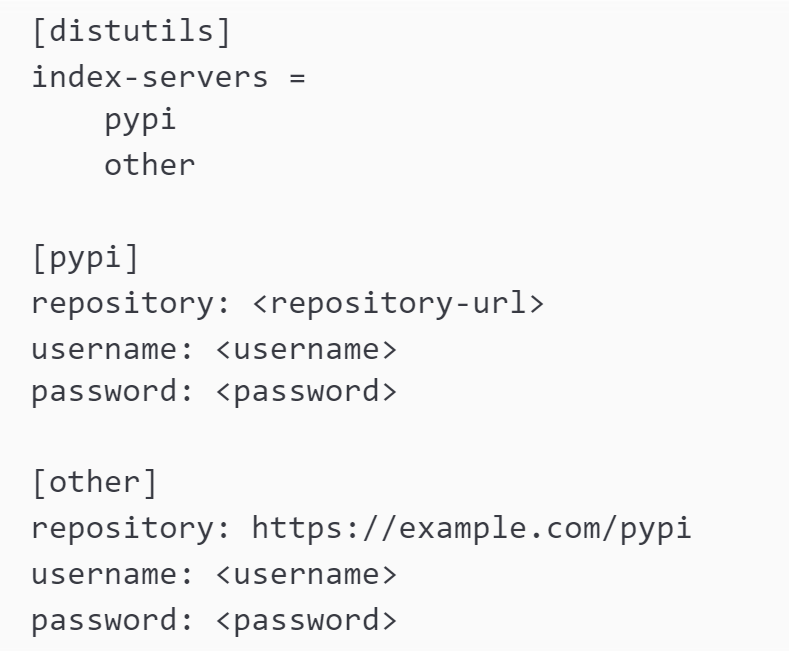





La section distutils doit avoir la variable index-servers qui répertorie toutes les sections décrivant tous les référentiels et informations d'identification disponibles pour elles. Il n'y a que les trois variables suivantes qui peuvent être modiées pour chaque section du référentiel

* repository : il s'agit de l'URL du référentiel de packages (par défaut https://pypi.org/)

* username : c'est le nom d'utilisateur pour l'authentification dans le référentiel donné

* password : c'est le mot de passe de l'utilisateur pour l'authentification dans le référentiel donné (en texte brut)


Notez que le stockage de votre mot de passe de référentiel en texte brut n'est peut-être pas le choix de sécurité le plus judicieux. Vous pouvez toujours le laisser vide. Twine vous demandera les informations d'identification lorsqu'elle en aura besoin


Le fichier .pypirc doit être respecté par chaque outil d'empaquetage construit pour Python. Bien que cela puisse ne pas être vrai pour tous les utilitaires liés à l'emballage, il est pris en charge par les plus importants, tels que pip, twine, distutils et setuptools. 

Le danger d'utiliser le fichier .pypirc avec Twine est que Twine est par défaut défini pour publier des packages sur PyPI. Cela peut être un problème si vous travaillez avec du code source fermé et que vous souhaitez publier votre package dans un index de package privé. Si vous oubliez d'utiliser l'argument de registre approprié (l'indicateur -r) et que votre fichier .pypirc est configuré pour fonctionner avec PyPI, vous pouvez accidentellement rendre votre code fermé accessible au public.


    L'un des outils qui résout plusieurs problèmes d'empaquetage du code Python
    est la poetry. Il ne nécessite pas de fournir des scripts de distribution
    personnalisés (les scripts setup.py sont remplacés par le fichier de
    configuration pyproject.toml), est entièrement interactif et vous permet de
    spécifier un registre de packages dédié avec le code source de votre projet
    . Habituellement, distribuer des packages avec Poetry est aussi simple que
     d'exécuter deux commandes

     poetry build
     poetry publish

     Vous pouvez en savoir plus sur la création et la publication de packages
      avec Poetry sur https://python-poetry.org/docs/cli/#publish.

## Gestion des versions et des dépendances des packages 

Si votre package est publié sur le registre des packages, il est probable que vous souhaitiez le modifier à un moment donné et en publier une nouvelle version. Afin de permettre aux développeurs de décider s'ils souhaitent utiliser une nouvelle version du package ou non, nous utilisons des spécificateurs de version pour baliser les versions consécutives du package


Un spécificateur de version prend généralement la forme d'une chaîne composée de nombres séparés par des points (comme 1.0, 3.6.5 ou 4.0.0). C'est pourquoi les spécificateurs de version sont aussi communément appelés numéros de version. Cela permet de trier facilement les spécificateurs de version. Par convention, une version supérieure signifie une version plus récente. Cette convention est assumée par presque tous les outils de gestion de versions de packages et permet des mises à jour directes des packages obsolètes vers leur version la plus récente. Par exemple, avec pip, vous pouvez installer une version plus récente du package en utilisant le commutateur -U comme dans l'exemple suivant

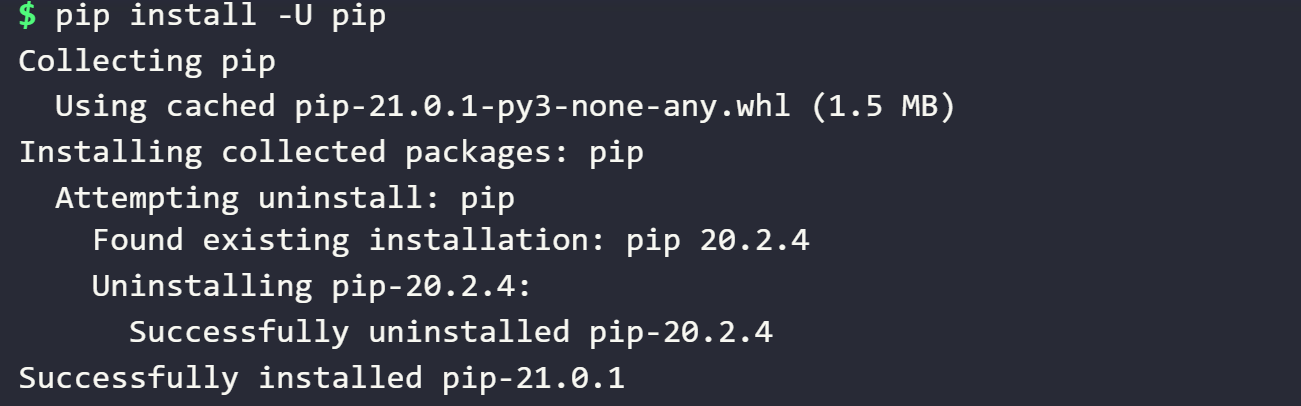

Dans l'exemple ci-dessus, nous avons utilisé pip pour se mettre à jour (il est distribué sous forme de package). La sortie montre que la version pip actuellement installée était 20.2.4. Au moment de l'exécution de cette commande, la version de pip la plus récente sur PyPI était la 21.0.1. pip a comparé ces deux spécificateurs de version et a décidé que celui disponible sur PyPI est un numéro de version plus élevé. Il a désinstallé l'ancienne version et installé la nouvelle dans l'environnement actuel. 

Bien que les versions des packages ne soient généralement composées que de chiffres, Python vous permet d'utiliser des lettres dans les spécificateurs de version. Cela vous permet, par exemple, de marquer des versions spécifiques en tant que pré-versions, versions de développement ou post-version. Ces composants spécificateurs de version supplémentaires sont généralement inclus en tant que dernier segment spécificateur de version juste après les segments numériques.


Le document PEP 440 (Version Identification and Dependency Specication) est la norme ofcielle pour la gestion des versions des packages qui, entre autres, spécifie les conventions suivantes pour ces balises de version spéciales :

*  {a|b|rc} N : désigne la version préliminaire (alpha, bêta ou version candidate). Ces balises désignent des versions à divers stades de développement. Les versions alpha sont les premières étapes et les versions candidates sont proches d'être les versions finales. Un package peut avoir plusieurs versions à n'importe quelle étape de pré-version et elles se distinguent par l'augmentation du nombre N. Un exemple de progression des versions préliminaires pourrait être : 1.0.0a1, 1.0.0a2, 1.0.0b1 et 1.0.0rc. Les versions sans balises de pré-version sont considérées comme finales et ont toujours la priorité sur les pré-versions avec le même numéro de préfixe

* postN : Désigne une version post-release. Les post-versions sont souvent utilisées pour publier une mise à jour qui ne constitue pas un x fonctionnel ou une amélioration. Des exemples pourraient être des mises à jour des métadonnées ou de la documentation du package (si elles sont incluses dans la distribution du package). Le même numéro de version peut avoir plusieurs publications et ils se distinguent par l'augmentation du numéro N. Des post-releases peuvent également être ajoutées aux pré-releases. Des exemples de spécificateurs de version post-publication pourraient être 1.0.0-post1, 1.0.0a1.post1 et 1.0.0.a1.post2

* devN : Désigne une version de développement. Certains mainteneurs de packages choisissent de publier des packages dans le cadre de systèmes d'intégration continue et ces versions de développement peuvent être utilisées pour distinguer les versions consécutives du package. Le même numéro de version peut avoir plusieurs versions de développement distinguées en augmentant le nombre N. Les versions de développement peuvent également être ajoutées aux pré-versions et aux post-versions, bien que cette pratique soit fortement déconseillée sur les index de packages publics à usage général


Les pré-versions, les post-versions et les versions de développement ajoutent une certaine complexité à la gestion des versions des packages et ne sont donc pas utilisées par de nombreux mainteneurs de packages. Quoi qu'il en soit, au moins les pré-versions peuvent être un outil utile pour donner aux développeurs la possibilité de prévisualiser et d'évaluer une future version du package dans leur propre environnement



Ce qui compte le plus, c'est le numéro de version final du package. Il existe deux stratégies courantes de gestion des versions pour décider du numéro à attribuer à la nouvelle version du package :

* Gestion des versions sémantique : cette stratégie suppose que chaque composant numérique a une valeur sémantique qui permet aux consommateurs de packages de déduire la quantité et la portée des changements entre deux versions.

* Gestion des versions du calendrier : cette stratégie suppose que les composants numériques sélectionnés sont dérivés de la date à laquelle la nouvelle version a été conçue (ou était censée être conçue). Cela permet aux utilisateurs de déduire le temps de développement qui s'est écoulé entre deux versions.

Pour faciliter les choses, la communauté a mis au point deux normes pour ces stratégies de gestion des versions afin de faciliter leur adoption. Regardons-les de plus près

## Installer vos propres packages

Travailler avec setuptools consiste principalement à créer et à distribuer des packages. Cependant, vous devez toujours utiliser setuptools pour installer les packages directement à partir des sources du projet. Et la raison en est simple. C'est une bonne habitude de tester si notre code d'emballage fonctionne correctement avant de soumettre votre colis à PyPI. 

Et le moyen le plus simple de le tester est de l'installer. Si vous envoyez un package cassé au référentiel, vous devez augmenter le numéro de version afin de le télécharger à nouveau. de perdre votre temps

## Installer des packages directement à partir des sources

L'installation directement à partir de vos propres sources à l'aide des outils de configuration peut être essentielle lorsque vous travaillez sur plusieurs packages liés en même temps :

    setup.py install

La commande install,  installe le package dans votre environnement Python actuel. Il essaiera de compiler le package si aucune compilation précédente n'a été effectuée, puis injectera le résultat dans le répertoire du système de fichiers où Python recherche les packages installés. Si vous avez une archive avec une distribution source d'un paquet, vous pouvez la décompresser dans un dossier temporaire, puis l'installer avec cette commande. La commande install installera également les dépendances définies dans l'argument install_requires. Les dépendances seront installées à partir de PyPI. 

Lors de l'installation d'un package, une alternative au script setup.py consiste à utiliser pip. Comme il s'agit d'un outil recommandé par PyPA, vous devez l'utiliser même lors de l'installation d'un package dans votre environnement local uniquement à des fins de développement. Pour installer un package à partir de sources locales, exécutez la commande suivante

    pip install <project-path>

Si vous souhaitez installer un package à partir de l'archive de distribution, cette commande devient:

    pip install <path-to-archive>

Étonnamment, le script setup.py n'a pas la commande de désinstallation. Heureusement, il est possible de désinstaller n'importe quel package Python en utilisant pip comme suit

    pip uninstall <package-name>



La désinstallation peut être une opération dangereuse lorsqu'elle est tentée sur des packages à l'échelle du système. C'est une autre raison pour laquelle il est si important d'utiliser des environnements virtuels pour tout développement. L'installation de packages via le script setup.py ou la commande pip install copie les sources du package (ou le contenu de la distribution) dans votre répertoire site-packages. Mais parfois, nous voulons rendre les sources des packages disponibles dans un environnement spécifique sans les copier. Cette méthode d'installation est appelée installation en mode modifiable et est particulièrement utile lorsque vous travaillez sur plusieurs packages associés qui ont des arborescences de sources indépendantes.



## Installation des packages en mode modifiable 

Les packages installés avec setup.py install sont copiés dans le répertoire site-packages de votre environnement Python actuel. Cela signifie que chaque fois que vous modifiez les sources de ce package, vous devez le réinstaller. C'est souvent un problème lors d'un développement intensif car il est très facile d'oublier la nécessité d'effectuer à nouveau l'installation. C'est pourquoi setuptools fournit une commande de développement supplémentaire qui vous permet d'installer des packages en mode développement. 

Cette commande crée un lien spécial vers les sources du projet dans le répertoire de déploiement (site-packages) au lieu d'y copier l'intégralité du package. Les sources des packages peuvent être modifiées sans qu'il soit nécessaire de les réinstaller et sont disponibles dans sys.path comme si elles étaient installées normalement.

pip vous permet également d'installer des packages dans un tel mode. Cette option d'installation est appelée mode modifiable et peut être activée avec le paramètre -e dans la commande d'installation comme suit

    pip install -e <project-path>

Une fois que vous avez installé le package dans votre environnement en mode modifiable, vous pouvez librement modifier le package installé en place et toutes les modifications seront immédiatement visibles sans qu'il soit nécessaire de réinstaller le package. 

L'utilisation du mode modifiable vous aide lorsque vous devez travailler avec plusieurs packages associés. sans avoir besoin de les réinstaller en permanence. Une autre pratique utile dans les projets composés de plusieurs packages associés consiste à utiliser des packages d'espace de noms.

## Packages Namespace 

Le Zen of Python dit ce qui suit à propos des espaces de noms : 

Les espaces de noms sont une excellente idée – faisons-en plus ! 

Et cela peut être compris d'au moins deux manières. Le premier est un espace de noms dans le contexte du langage. Nous utilisons tous les espaces de noms suivants sans même le savoir : 

* L'espace de noms global d'un module 
* L'espace de noms local de l'invocation de la fonction ou de la méthode 
* L'espace de noms de la classe


L'autre type d'espaces de noms peut être fourni au niveau de l'empaquetage. Ce sont des packages d'espace de noms. Il s'agit souvent d'une fonctionnalité négligée des packages Python qui peut être très utile pour structurer l'écosystème de packages dans votre organisation ou dans un très grand projet.

 Les packages d'espace de noms peuvent être compris comme un moyen de regrouper des packages associés, où chacun de ces packages peut être installé. indépendamment. 
 
 Les packages d'espace de noms sont particulièrement utiles si vous avez des composants de votre application développés, empaquetés et versionnés indépendamment, mais que vous souhaitez toujours y accéder à partir du même espace de noms. Cela permet également de préciser à quelle organisation ou à quel projet appartient chaque package. Par exemple, pour une entreprise imaginaire Acme, l'espace de noms commun pourrait être acme. Par conséquent, cette organisation pourrait créer le package d'espace de noms acme général qui pourrait servir de conteneur pour d'autres packages de cette organisation. Par exemple, si quelqu'un d'Acme souhaite contribuer à cet espace de noms avec, par exemple, une bibliothèque liée à SQL, il peut créer un nouveau package acme.sql qui s'enregistre dans l'espace de noms acme. 
 
 
 Il est important de savoir quelle est la différence entre paquets normaux et d'espace de noms et quel problème ils résolvent. Normalement (sans packages d'espace de noms), vous créeriez un package appelé acme et un sous-package sql avec la structure de fichier suivante

 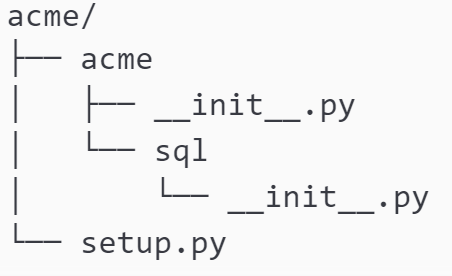


Chaque fois que vous souhaitez ajouter un nouveau sous-package, disons un modèle, vous êtes obligé de l'inclure dans l'arborescence des sources d'acme comme suit

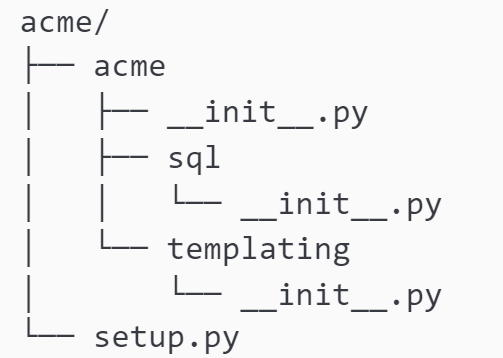

Une telle approche rend le développement indépendant de acme.sql et acme.templating presque impossible. Le script setup.py devra également spécifier toutes les dépendances pour chaque sous-paquet. Il est impossible (ou du moins très difficile) d'avoir une installation optionnelle de certains des composants acme. De plus, avec suffisamment de sous-packages, il peut être difficile d'éviter les conflits de dépendances. 

Avec les packages d'espace de noms, vous pouvez stocker l'arborescence source pour chacun de ces sous-packages indépendamment comme suit

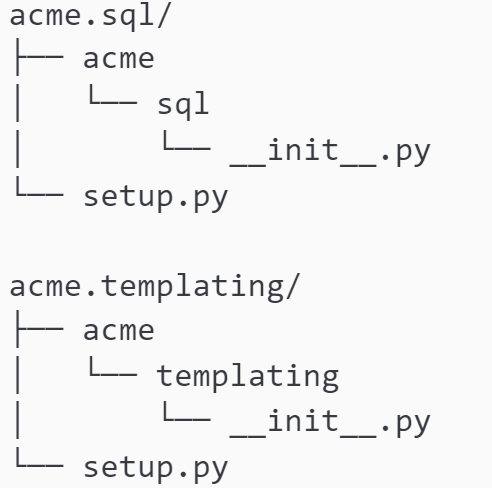

Et vous pouvez également les enregistrer indépendamment dans PyPI ou dans tout index de package que vous utilisez. Les utilisateurs peuvent choisir lequel des sous-packages ils souhaitent installer à partir de l'espace de noms acme, mais ils n'installent jamais le package acme général (il n'a même pas besoin d'exister). Exemple d'utilisation de pip serait comme suit.

    pip install acme.sql acme.templating

Notez que la fonction setuptools.find_packages() ne trouve pas les packages d'espace de noms. Si vous souhaitez que votre script setup.py collecte automatiquement les packages d'espace de noms au lieu de les répertorier individuellement, vous devez plutôt utiliser setuptools.find_namespace_packages()

Cette fonction découvrira automatiquement les packages d'espace de noms dans les structures de répertoires, comme présenté dans l'exemple précédent. Les packages et les packages d'espace de noms concernent principalement le partage de code entre des projets exécutés dans divers environnements. Si vous installez un tel package dans un environnement donné, il sera immédiatement disponible pour les importations. Mais ce n'est pas le seul but de l'empaquetage Python. 

De nombreux projets Python fournissent des utilitaires shell, des commandes ou même des applications avec des interfaces graphiques. Un bon exemple est la commande pip distribuée avec le package pip. Vous pouvez utiliser l'infrastructure de packaging Python pour afficher vos scripts d'application et vos modules exécutables dans l'environnement d'installation cible de la même manière que le package pip. Voyons comment faire cela

## Scripts de package et points d'entrée

Chaque module Python peut être exécuté comme s'il s'agissait d'un programme utilisant la commande python -m. Cela inclut les modules de bibliothèque standard ainsi que les modules des packages installés par pip. Par exemple, ce qui suit est une invocation du module json.tool de la bibliothèque standard qui vous permet de formater du texte JSON dans votre shell

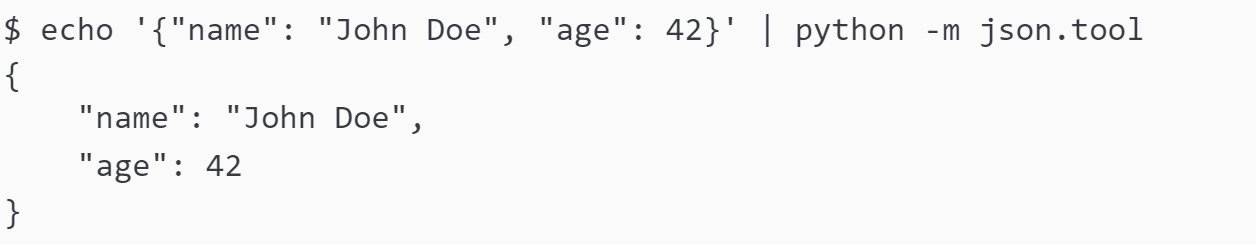

C'est un moyen simple d'exécuter n'importe quel module du package installé, mais pas le plus pratique. Surtout, les utilisateurs de votre package devront savoir quelle est la structure des modules à l'intérieur de votre application et savoir quels modules sont censés être exécutés dans le shell. De plus, les utilisateurs devront taper la commande python -m, ce qui ajoute un peu de redondance à leurs scripts. C'est pourquoi, lors de l'utilisation de pip, nous préférons invoquer la commande pip plutôt que python -m pip. 

Lorsque vous écrivez vos propres packages Python, vous pouvez faire la même chose que le package pip et fournir votre propre commande shell personnalisée qui sera installée ensemble avec votre colis. Il y a deux façons de le faire :

* Via l'argument scripts de la fonction setuptools.setup() 
* Via l'argument entry_points de la fonction setuptools.setup()


L'argument scripts est la méthode la plus basique pour fournir des commandes shell via votre package. L'argument est déjà pris en charge par le module distutils (le module de bibliothèque standard sur lequel setuptools est basé) donc c'est assez simple. Il accepte une liste de chemins de fichiers de script qui doivent être distribués avec votre package. Après l'installation du package, ces scripts deviennent disponibles dans l'un des répertoires PATH associés à votre environnement Python. 


Pour voir comment cela fonctionne, nous allons réutiliser l'exemple du script qui trouve des importations dans les sources Python, New Things in Python. Nous allons commencer par créer le fichier findimports.py avec le contenu suivant :

In [ ]:
import os
import re
import sys

import_re = re.compile(r"^\s*import\s+\.{0,2}((\w+\.)*(\w+))\s*$")
import_from_re = re.compile(
    r"^\s*from\s+\.{0,2}((\w+\.)*(\w+))\s+import\s+(\w+|\*)+\s*$"
)

def main():
    if len(sys.argv) != 2:
        print(f"usage: {os.path.basename(__file__)} file-name")
        sys.exit(1)

    with open(sys.argv[1]) as file:
        for line in file:
            if match := import_re.match(line):
                print(match.groups()[0])

            if match := import_from_re.match(line):
                print(match.groups()[0])

if __name__ == "__main__":
    main()

SyntaxError: ignored

À partir de là, nous allons créer le script setup.py suivant avec quelques métadonnées de base et l'argument scripts

In [ ]:
from setuptools import setup

setup(
   name="findimports",    
   version="0.0.0",    
   py_modules=["findimports.py"],    
   scripts=["findimports"],
   )

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Vous pouvez maintenant installer le package soit en mode modifiable à l'aide de l'une des commandes suivantes.

    pip install -e .
    python setup.py develop

Ou si vous préférez, vous pouvez installer le package en mode normal

    pip install .
    python setup.py install

Une fois le package installé, le module findimports sera disponible en tant que commande shell. Sur macOS ou Linux, nous pouvons utiliser compgen et grep pour rechercher dans toutes les commandes détectables et voir qu'il est désormais effectivement disponible dans votre shell

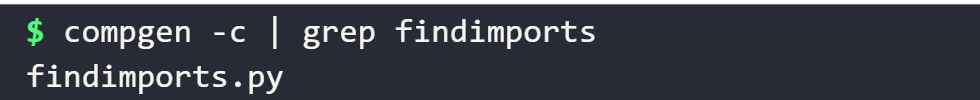



Comme vous le voyez, le script findimports.py est désormais disponible sous le nom qui est exactement le même que le nom du fichier de script. Si vous voulez vraiment omettre l'extension .py de la commande shell, vous avez l'une des deux options suivantes : 

* Supprimez l'extension .py du nom de fichier du module : vous devrez mettre à jour le script setup.py en conséquence. L'inconvénient de cette approche est que vous ne pourrez plus distribuer le module findimports en tant que module Python importable (l'argument py_modules). Cela rendrait également plus difficile les tests unitaires du module de script. 

* Créez un script wrapper pour findimports.py : l'argument scripts vous permet de distribuer tout type de script, y compris les scripts shell. Ici, nous pourrions créer un script shell wrapper avec un nom sans extension (par exemple, scripts/findimports) et le spécifier comme cible de l'argument scripts. Le fichier pourrait être aussi simple que ce qui suit:

    
    #!/usr/bin/env sh
    python -m findimports


Les problèmes avec les extensions de fichiers de script et les scripts wrapper dans distutils peuvent être évités grâce à l'extension entry_points offerte par le module setuptools. Il s'agit d'un moyen standardisé de fournir des points d'entrée d'application (comme des scripts shell) via la configuration du script de distribution setup.py. Il vous permet de cibler n'importe quelle fonction dans les sources de votre package à distribuer en tant que script shell. 

Cela simplifie grandement la gestion des points d'entrée de l'application car vous n'avez pas besoin de créer des modules exécutables dédiés. Il existe différents types de points d'entrée possibles mais le plus courant est console_scripts, qui vous permet d'enregistrer le module ou la fonction en tant que cible de la commande de script généré automatiquement. Ce qui suit est un exemple du point d'entrée de la console que nous pourrions fournir pour notre script findimports

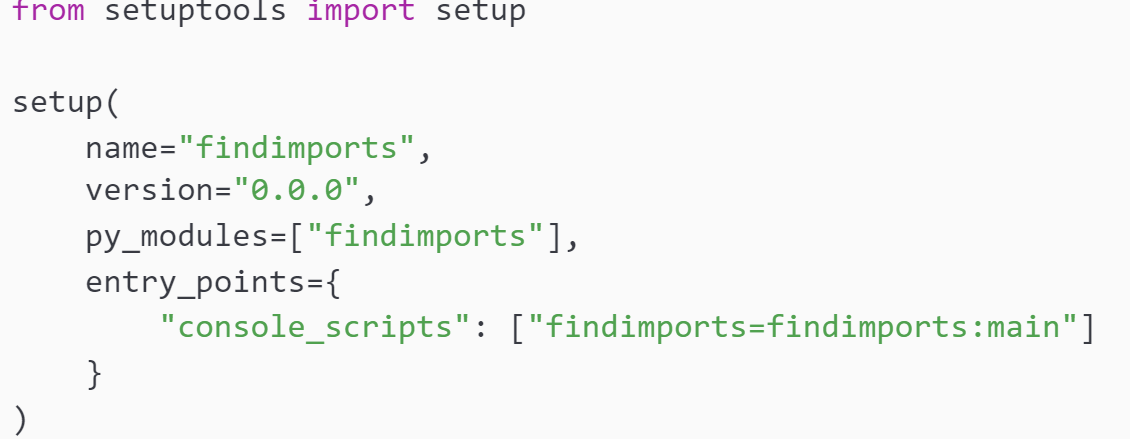

L'utilisation des points d'entrée de la console est plus flexible lorsqu'il s'agit de nommer les commandes et de sélectionner ce qu'il faut exactement exécuter lorsqu'une commande est invoquée. Sur le côté gauche du signe =, nous avons le nom souhaité de la commande. Dans notre cas, il s'agit simplement de findimports. Sur le côté droit, nous avons un chemin d'importation de module (findimports à nouveau) avec le nom de la fonction (la fonction main()) à exécuter. 

L'argument entry_points permet de mieux nommer les commandes ainsi que de regrouper plusieurs commandes dans un seul module Python. Mais cela ne signifie pas que l'argument scripts devient inutile. Vous ne pouvez pas, par exemple, packager des scripts shell (comme Bash) avec des points d'entrée, mais vous pouvez le faire avec l'argument scripts

    La fonctionnalité des points d'entrée dans le package setuptools est en
    fait une méthode générique de crochets publicitaires entre les packages.
    Chaque package peut interroger les points d'entrée existants d'autres
    packages. Cette fonctionnalité peut être utilisée, par exemple, pour créer
    un mécanisme de plugin. Le framework de test unitaire pytest est un exemple
    de package qui utilise le mécanisme des points d'entrée pour son système de
    plugin. Vous pouvez en savoir plus sur l'écriture de plugins pytest sur
    https://docs.pytest.org/en/stable/writing_plugins.html.


L'empaquetage Python, grâce aux wheels binaires et aux fonctionnalités qui autorisent les scripts d'empaquetage, peut être une méthode de distribution d'applications complètes. Si vous utilisez des environnements virtuels, vous pouvez garantir une isolation de dépendance raisonnable entre diverses applications.

Malheureusement, l'empaquetage Python et les environnements virtuels ne résolvent pas tous les problèmes d'isolation d'environnement. Vous ne pouvez pas, par exemple, protéger vos applications des modifications apportées aux bibliothèques système partagées via des environnements Python virtuels. De plus, toutes les dépendances Python que vous utilisez ne seront pas distribuées dans un format de roue binaire. Les extensions Python écrites en C, C++ ou Cython sont incroyablement populaires, ce qui signifie que pour les applications complexes, une compilation sur site peut souvent être nécessaire. Le manque d'isolation pure des dépendances et un besoin courant de compilation sur site sont les principales raisons pour lesquelles les packages Python ne sont souvent pas des artefacts de distribution fiables pour des cas d'utilisation spécifiques. L'un de ces cas d'utilisation est l'empaquetage d'applications et de services pour le Web

## Packaging applications and services for the web


La distribution de logiciels est un processus qui nécessite traditionnellement deux parties. Quelqu'un (le distributeur) doit rendre la version du logiciel disponible pour être consommée. Dans le passé, cela nécessitait des supports physiques comme une disquette ou un CD, mais de nos jours, cela se fait généralement via Internet. Quelqu'un d'autre (le consommateur) doit obtenir consciemment le logiciel et l'installer sur son propre ordinateur. Il n'en va pas toujours de même pour les mises à jour logicielles car de nombreuses applications proposent des mises à jour automatisées. Pourtant, ces mises à jour nécessitent généralement le consentement de l'utilisateur pour être installées. 

Avec l'avènement du logiciel en tant que service (SaaS), de moins en moins de logiciels sont distribués sous une forme qui permettrait de les installer sur le propre ordinateur de l'utilisateur. Nous constatons que les programmes classiques sont progressivement remplacés par leurs homologues SaaS :

* Les applications de bureau traditionnelles sont remplacées par des logiciels Web

* Les bibliothèques logicielles traditionnelles sont remplacées par des API Web

Les logiciels Web ne sont pas distribués à ses utilisateurs de la même manière que une application de bureau Web traditionnelle. 

Les utilisateurs d'applications Web interagissent généralement avec eux via un navigateur Web standard ou un client dédié qui agit comme un simple shell pour votre code qui réside sur un serveur ou un groupe de serveurs. Il doit en effet être distribué à ces serveurs de toute façon, mais l'ensemble du processus est généralement opaque pour les utilisateurs finaux et ils sont rarement au courant de ce processus.

C'est pourquoi de nombreux développeurs préfèrent souvent le terme d'expédition dans le contexte d'applications Web : les consommateurs s'inscrivent consciemment en tant qu'utilisateurs du logiciel mais ont un contrôle très limité sur la manière et le moment où il sera livré. De plus, les mises à jour potentielles sont simplement poussées par leur porte et ne peuvent pas être facilement rejetées ou rejetées. 

Les applications Web sont de plus en plus populaires. Même les applications principalement destinées à une utilisation sur ordinateur fournissent souvent des fonctionnalités Web telles que des mises à jour automatisées, la synchronisation dans le cloud ou la collaboration en ligne. Cela signifie qu'il vaut la peine de connaître les bases de la livraison de ces applications Web, même si le Web n'est pas votre truc. 

## Le manifeste de l'application Twelve-Factor

Être capable de distribuer des logiciels uniquement sur vos propres serveurs supprime un facteur important du processus de distribution : les utilisateurs. Vous n'avez pas à vous soucier de savoir s'ils sont capables de télécharger votre application et de gérer le processus d'installation. Vous n'avez pas à vous soucier de leur système d'exploitation (même si vous devrez peut-être vous soucier de leur navigateur). Et aussi, la plupart du temps, vous n'avez pas à demander la permission d'effectuer la mise à jour. Tu peux faire ce que tu veux.

 Mais devriez-vous le faire ? Un logiciel basé sur le Web présente de nombreux avantages. Vous en avez le plein contrôle. Vous pouvez faire autant de mises à jour que vous le souhaitez et quand vous le souhaitez. Mais c'est une arme à double tranchant. Les utilisateurs d'applications Web s'attendront à des mises à jour fréquentes et à des correctifs presque immédiats pour les problèmes qu'ils soumettent. De plus, si votre logiciel réussit, vous devrez compter sur un grand parc de serveurs pour prendre en charge l'échelle croissante de votre base d'utilisateurs. Et une large base d'utilisateurs est généralement l'objectif des applications Web. 
 
 C'est pourquoi il est extrêmement important de créer votre logiciel de manière à permettre sa croissance à un rythme durable. 
 
 Votre application doit être facilement configurable et découplée de ses dépendances (comme les services externes et le système d'exploitation) pour assurer une maintenance aisée et des déploiements simples et reproductibles de nouvelles versions. Il doit également être aussi simple à déployer dans un environnement de production qu'à exécuter localement pour le développement (et vice versa). 
 
 Ce n'est bien sûr pas facile à faire sans quelques connaissances opérationnelles. Si vous n'avez pas beaucoup d'expérience de travail avec des logiciels à grande échelle, vous ferez certainement beaucoup d'erreurs qui vous coûteront beaucoup de temps, de ressources et d'argent (coûts de serveur par exemple). C'est pourquoi c'est une bonne idée de suivre un ensemble de bonnes pratiques éprouvées.


 Le manifeste de l'application Twelve-Factor est un bon ensemble de telles pratiques. Il s'agit d'une méthodologie générale indépendante du langage pour créer des applications SaaS. L'un de ses objectifs est de faciliter le déploiement des applications, mais il met également en évidence d'autres sujets tels que la maintenabilité ou la facilité d'évolutivité des applications.Comme son nom l'indique, l'application Twelve-Factor se compose de 12 règles :
 
 * 1. Base de code : une base de code suivie dans un système de contrôle de révision et de nombreux déploiements
 * 2. Dépendances : déclarez et isolez explicitement les dépendances
 * 3. Config : Stocke les configurations dans l'environnement
 * 4. Services de support : traitez les services de support comme des ressources attachées
 * 5. Construire, publier, exécuter : Séparez strictement les étapes de génération et d'exécution6. Processus : exécutez l'application en tant qu'un ou plusieurs processus sans état
 * 7. Liaison de port : Exportez les services via la liaison de port
 * 8. Concurrence : évolutive via le modèle de processus
 * 9. Jetable : Maximisez la robustesse avec un démarrage rapide et un arrêt en douceur
 * 10. Parité dev/prod : gardez le développement, la mise en scène et la production aussi similaires que possible
 * 11. Logs : traitez les Logs comme des flux d'événements
 * 12. Processus d'administration : exécutez les tâches d'administration/gestion en tant que processus ponctuels

 Nous ne discuterons pas de chaque facteur en détail, car le site Web de l'application Twelve-Factor fournit une excellente explication et une justification pour chacun d'eux. Nous allons de toute façon zoomer sur des règles spécifiques car certaines d'entre elles peuvent être utilisées à l'aide d'outils, de techniques ou de bibliothèques populaires qui sont populaires dans l'écosystème Python

## Tirer parti de Docker

Nous avons déjà présenté Docker, Environnements de développement Python modernes, en tant qu'outil de virtualisation léger qui peut fournir une excellente isolation de l'environnement de développement.

Il regroupe simplement tout votre code et ses dépendances d'exécution (modules, packages, bibliothèques partagées) dans des images de conteneur qui peuvent être exécutées en tant que conteneurs isolés dans des environnements donnés. De plus, les conteneurs Docker sont sans état. Cela signifie que deux conteneurs démarrés à partir de la même image auront le même état initial. Chaque modification du système de fichiers effectuée dans un conteneur reste à l'intérieur du conteneur. Une partie du système de fichiers à l'intérieur d'un conteneur peut bien sûr être exportée à l'extérieur en montant un volume dédié mais cela est toujours explicite et n'arrive jamais par accident. Un conteneur qui a terminé son travail (le processus principal s'est terminé, soit en douceur, soit en raison d'une interruption brutale) est hors d'usage, tout comme son état interne


La façon dont les conteneurs Docker et leurs images sont définis, exécutés et gérés coche déjà plusieurs cases du manifeste de l'application Twelve-Factor :

* Dépendances : pour créer une nouvelle image Docker, vous devez définir un fichier Docker, qui est un énoncé déclaratif de toutes les étapes de préparation. Cela inclut toutes les bibliothèques partagées, les packages et votre propre code. De plus, les builds Docker en plusieurs étapes vous permettent de séparer les dépendances au moment de la construction des builds d'exécution. Les dépendances sont isolées. Vous pouvez avoir plusieurs conteneurs de différentes images Docker s'exécutant sur les mêmes systèmes hôtes et leurs dépendances ne seront jamais en conflit. 

* Build, release, run : les images Docker sont généralement créées en dehors de leur environnement d'exécution dédié. Il peut s'agir d'un serveur de build dédié ou même de votre propre ordinateur utilisé pour le développement. Les images sont généralement stockées dans un référentiel d'images dédié. À partir de là, les démons Docker exécutés dans les environnements cibles peuvent extraire la dernière version de l'image. De plus, le balisage des images avec des étiquettes descriptives vous permet de suivre facilement leurs versions et même leur désignation pour un environnement spécifique.

• Processus : les conteneurs Docker sont sans état. De plus, un conteneur ressemble à un processus unique du point de vue du système d'exploitation qui l'héberge. Il met en sandbox tous les threads ou sous-processus pouvant s'exécuter dans un conteneur ainsi que toutes les ressources qu'il peut utiliser (mémoire, par exemple)


* Dev/prod parity : L'empaquetage du logiciel dans des conteneurs vous permet de réduire l'écart entre les environnements de production et de développement car il isole de nombreuses dépendances du système d'exploitation. De plus, Docker Compose vous permet de composer des applications entières à partir de plusieurs conteneurs et d'utiliser les mêmes versions de services de support (bases de données, caches, proxys inverses, etc.) que celles utilisées dans l'environnement de production.


La grande chose à propos de Docker est la portabilité des applications. Tant que votre système cible peut exécuter le démon Docker, il pourra exécuter vos conteneurs. Si vous exploitez votre propre cluster de serveurs (physiques ou virtuels), vous devrez les provisionner avec le démon Docker et fournir également des configuration et/ou scripts qui garantiront que vos conteneurs sont toujours opérationnels. Mais c'est quelque chose que vous auriez à faire de toute façon avec n'importe quel type de logiciel. Docker peut vous faciliter la vie car chaque application aura le même type de livrable (une image de conteneur) et ne nécessitera pas de processus d'installation complexe. La gestion des conteneurs seule peut être effectuée, par exemple, avec systemd, un gestionnaire de système et de service commun que l'on trouve dans la plupart des distributions Linux


Mais toutes les organisations ne sont pas disposées à prendre en charge leur propre infrastructure. Heureusement, de nombreux fournisseurs de cloud proposent divers services qui peuvent alléger une grande partie de la charge d'exploitation des utilisateurs de Docker. Pour une plus grande échelle, vous pouvez utiliser des systèmes d'orchestration de conteneurs dédiés comme Kubernetes (k8s). Kubernetes est un système d'orchestration de conteneurs conçu par Google. Il organise des collections de conteneurs d'applications qui doivent s'exécuter sur le même nœud de cluster en groupes appelés Pods. Kubernetes peut gérer les volumes de conteneurs, les cartes de configuration, contrôler la mise à l'échelle automatisée des services et gérer la communication au sein du cluster ainsi que le trafic entrant.

Kubernetes peut gérer une gamme de besoins d'orchestration de conteneurs, des clusters Kubernetes gérés où vous pouvez décider du nombre de nœuds de travail dont vous avez besoin et comment les configurer, aux offres entièrement sans serveur où vous fournissez simplement des images Docker avec leur configuration et le cloud fournisseur s'occupe de faire évoluer l'infrastructure pour vous. La tarification flexible à la demande signifie souvent que vous ne payez que pour les ressources allouées. Cela vous permet d'éviter d'importants coûts d'infrastructure initiaux et d'évoluer au fur et à mesure de votre croissance. 

Docker n'est bien sûr pas le seul moyen pour les applications d'être portables entre les hôtes ou les fournisseurs de services. Mais quel que soit le format d'empaquetage, votre application ne sera pas portable si elle n'est pas configurable de manière indépendante du système et des applications. Jetons un coup d'œil aux options de configuration typiques des applications.

## Gestion des variables d'environnement

Chaque application nécessitera des valeurs de configuration qui varieront selon les environnements. Exemples :

* Chaînes de connexion (URL), noms d'hôte et ports de services de sauvegarde tels que caches, bases de données, serveurs proxy ou API Web

* Informations d'identification pour ces services

* Autres secrets tels que clés de chiffrement et certificats client

* Valeurs par environnement comme les basculements de fonctionnalités ou les limites de ressources. 

Ces valeurs de configuration doivent toujours être séparées du code de l'application et ne doivent certainement pas être stockées en tant que constantes dans les modules. C'est particulièrement important pour les valeurs qui doivent rester secrètes. Il y a plusieurs raisons à cela :

* La première est la sécurité. Si le code contient des informations sur les secrets et les informations d'identification, celui qui a accès au code les connaîtra tous. Et si quelqu'un a accès au référentiel de code, il saura tout ainsi que les secrets du passé. Cela pose un réel risque de sécurité.

* Une autre raison pour découpler la configuration des applications est la volatilité des environnements : ils vont et viennent. Un jour, vous pouvez travailler avec seulement quelques environnements, mais un autre jour, vous voudrez peut-être en créer plus. Et si vous vouliez créer un nouvel environnement de courte durée pour chaque branche de fonctionnalité sur laquelle vous travaillez ? Et si vous vouliez faire la même chose pour chaque membre de l'équipe sur le projet. Voulez-vous vraiment conserver toutes ces configurations dans le même référentiel de projet ?

* Enfin et surtout, la configuration doit être indépendante du langage et du framework. Vous utiliserez éventuellement différentes technologies pour exécuter votre logiciel. Vous pouvez changer votre framework ou peut-être même passer de Python à un langage complètement différent. Vous pouvez également souhaiter migrer d'une infrastructure à une autre à un moment donné. Aujourd'hui, il peut s'agir d'une simple application s'exécutant dans un environnement virtuel sur un hôte, mais demain, ce peut être un conteneur Docker dans un cluster Kubernetes. Ou même une fonction sans serveur gérée par votre fournisseur de cloud. Vous ne savez jamais comment votre application évoluera, vous devez donc vous assurer que la façon dont vous fournissez la configuration à votre application est aussi générique que possible.


Le moyen le plus universel de fournir une configuration à votre application consiste à utiliser des variables d'environnement. Il s'agit d'un mappage clé-valeur simple qui devrait être pris en charge par chaque système d'exploitation et chaque langage de programmation. Ils peuvent être facilement changés sans aucun code ni modication de fichier. 

Elles sont stockées uniquement dans un environnement de processus en cours d'exécution (qui est éphémère) et sont donc mieux adaptées pour fournir des valeurs secrètes à votre application. 

Le plus grand avantage de l'utilisation de variables d'environnement pour la configuration est qu'elles peuvent être complètement découplées du code source de l'application. Grâce à cela, vous pourrez utiliser le même artefact déployable (comme une image de conteneur Docker ou un package Python) dans divers environnements et le régler simplement en fournissant de nouvelles valeurs de variable d'environnement au démarrage de l'application. 

Cette approche réduit la dérive de version entre les environnements et vous permet d'éviter le regroupement de variables secrètes dans vos packages d'application. De plus, vous pouvez éventuellement décider d'utiliser du code écrit dans divers frameworks ou même langages. 

Les variables d'environnement autorisent le même support de configuration sur différentes technologies (par opposition aux fichiers ou modules de configuration dédiés). L'utilisation de variables d'environnement est simple. Si vous travaillez sur Linux, macOS ou un autre système compatible POSIX, vous pouvez définir une nouvelle valeur de variable d'environnement à l'aide de la commande export comme dans l'exemple suivant:

    export MY_VARIABLE="my-value"


Dans ces systèmes, vous pouvez également définir des variables spécifiques uniquement pour la portée d'un appel de commande. Pour ce faire, ajoutez une série de variables à la commande

    VARIABLE_1="value-1" command


Sous Windows, si vous utilisez PowerShell, vous pouvez définir une valeur de variable d'environnement via la variable spéciale $ env

    $env:TEAMS="my-value"

Si vous utilisez CMD sous Windows, vous pouvez également utiliser la commande set

    set MY_VARIABLE="my-value"


Comme vous pouvez le voir, en fonction de l'environnement, il existe différentes manières de définir les variables d'environnement. De plus, pour les systèmes d'orchestration de conteneurs comme Kubernetes ou les services cloud spécifiques aux fournisseurs, vous n'interagirez pas directement avec le shell du système. Vous définirez généralement les valeurs d'environnement souhaitées via des fichiers manifestes de service dédiés ou l'API du fournisseur. Ce qui ne change pas entre ces environnements, c'est la façon dont vous lisez ces variables. 

Les variables d'environnement en Python sont exposées dans la variable environ du module os intégré. C'est un objet de type dict qui permet l'accès et la modification des variables d'environnement.os.environ peut être consulté à tout moment, mais la convention commune est de créer un seul module dans votre application qui accède à toutes les variables d'environnement. Grâce à cela, vous obtenez un bon aperçu de toutes les options de configuration prises en charge par l'application et contrôlez tous les traitements et validations de valeur. L'exemple de configuration pour une petite application pourrait être le suivant

In [11]:
import os

DATABASE_URI = os.environ["DATABASE_URI"]

ENCRYPTION_KEY = os.environ["ENCRYPTION_KEY"]

BIND_HOST = os.environ.get("BIND_HOST", "localhost")

BIND_PORT = int(os.environ.get("BIND_PORT", "80"))

SCHEDULE_INTERVAL = timedelta(    
    seconds=int(os.environ.get("SHEDULE_INTERVAL_SECONDS", 50))
    )

KeyError: ignored

Comme vous pouvez le voir, os.environ a un protocole de dictionnaire commun. Si une variable donnée n'existe pas, l'accès aux éléments via la syntaxe [key] lèvera une exception KeyError. Il s'agit d'un moyen courant de spécifier les variables d'environnement qui sont requises et sans lesquelles l'application ne fonctionnera pas. De même, la méthode os.environ.get() vous permet de spécifier des variables d'environnement qui sont facultatives ou peuvent avoir une valeur par défaut. L'utilisation des valeurs par défaut est un moyen pratique de réduire la quantité de configuration requise pour un environnement individuel.

 Les bonnes cibles pour les valeurs par défaut sont les valeurs de configuration qui restent généralement les mêmes pour la plupart des environnements mais doivent être remplacées dans des cas d'utilisation spécifiques (un environnement de test, par exemple). 
 
 Du point de vue de la sécurité, les valeurs par défaut doivent refléter les valeurs de production plutôt que les valeurs de développement. Cela évite les erreurs de configuration accidentelles dans l'environnement le plus critique. Les valeurs par défaut ne doivent bien entendu jamais stocker de valeurs secrètes. 
 
 
 Enfin, certaines valeurs peuvent nécessiter une conversion en types de données spécifiques. C'est parce que les valeurs des variables d'environnement dans l'objet os.environ sont toujours des chaînes. Si vous avez besoin d'un type de données spécifique qui serait plus utile dans votre code, vous devez analyser et transformer la valeur de la chaîne. Dans l'exemple précédent, nous voyons la valeur BIND_PORT analysée au format entier et SHEDULE_INTERVAL_SECONDS transformée en un objet timedelta. apporter plus de structure à la configuration. 
 
 La bibliothèque standard Python ne dispose pas d'une telle fonctionnalité, mais il existe de nombreux utilitaires sur PyPI qui aident à gérer les variables d'environnement. L'un de ces utilitaires est le package environ-config. Il permet de préfixer automatiquement les variables d'environnement et de les regrouper dans des sections descriptives. Il offre une validation et une transformation faciles des valeurs. 
 
 Le noyau du paquet environ-config est le décorateur de classe environ.config() et le descripteur environ.var(). Ils sont utilisés pour définir des classes de configuration qui peuvent lire des valeurs directement à partir de l'objet os.environ. Ce qui suit est une réimplémentation du module de configuration précédent avec l'utilisation du package environ-config

In [12]:
from datetime import timedelta

import environ

@environ.config(prefix="")
class Config:    
  @environ.config()    
  class Bind:        
    host = environ.var(default="localhost")        
    port = environ.var(default="80", converter=int)

  bind = environ.group(Bind)    
  database_uri = environ.var()    
  encryption_key = environ.var()    
  schedule_interval = environ.var(        
      name="SCHEDULE_INTERVAL_SECONDS",        
      converter=lambda value: timedelta(seconds=int(value)),        
      default=50    
      )

ModuleNotFoundError: ignored

Afin de créer réellement un objet de configuration, vous pouvez utiliser Config.from_environ() comme dans l'exemple suivant

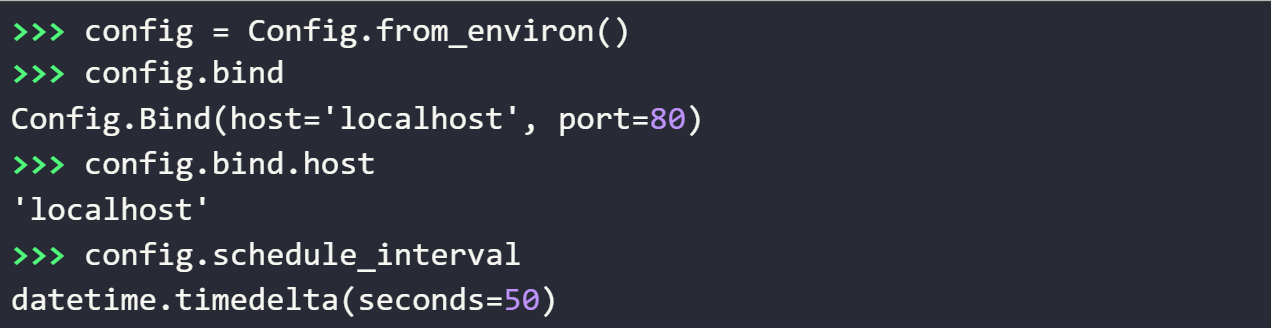

Les classes de configuration décorées avec le décorateur environ.config() rechercheront automatiquement les variables d'environnement en transformant leurs noms d'attributs en majuscules. Ainsi, l'attribut config.database_uri est directement lié à la variable d'environnement DATABASE_URI. Mais parfois, vous voudrez peut-être utiliser un nom spécique au lieu d'un nom généré automatiquement. 

Vous pouvez le faire facilement en fournissant l'argument du mot-clé name au descripteur environ.var(). Nous voyons un exemple d'une telle utilisation dans la définition de l'attribut schedule_interval. 

La définition de la classe Config.Bind et l'utilisation du descripteur environ.group() montrent comment les configurations peuvent être imbriquées. Le package environ-config est suffisamment intelligent pour préxer les noms de variables d'environnement demandées avec le nom de l'attribut de groupe. 

Cela signifie que l'attribut Config.bind.host se rapporte à la variable d'environnement BIND_HOST et que l'attribut Config.bind.port se rapporte à la variable d'environnement BIND_PORT.

 Mais la fonctionnalité la plus utile du module environment-config est la possibilité de gérer facilement la conversion et la validation des variables d'environnement. Cela peut être fait avec l'argument mot-clé convertisseur. Il peut s'agir d'un constructeur de type comme dans l'exemple Config.bind.port ou d'une fonction personnalisée qui prend un argument de chaîne de position.


 La technique courante consiste à utiliser des fonctions lambda uniques comme dans l'exemple Config.schedule_interval. Habituellement, l'argument convertisseur est juste suffisant pour s'assurer que la variable a le type et la valeur corrects. Si cela ne suffit pas, vous pouvez fournir un argument de mot-clé de validation supplémentaire. Il devrait s'agir d'un appelable qui reçoit la sortie de la fonction de conversion et renvoie le résultat final

## Le rôle des variables d'environnement dans les frameworks d'application 

Le rôle des variables d'environnement dans les frameworks d'application qui ont une disposition de fichiers de configuration ou de modules dédiés peut ne pas être clair. 

Un excellent exemple de tels frameworks est le framework Django, qui est fourni avec le module settings.py populaire. Le module settings.py de Django est un module de chaque application qui contient une collection de diverses variables de configuration d'exécution. Il sert à deux fins : 

* Énoncé de la structure de l'application dans le cadre : les applications Django sont une composition de divers composants : applications, vues, middleware, modèles, processeurs de contexte, etc. Le fichier settings.py est un manifeste de toutes les applications installées, des composants utilisés et une déclaration de leur configuration. La plupart de cette configuration est indépendante de l'environnement dans lequel l'application s'exécute. En d'autres termes, il fait partie intégrante de l'application.

* Dénition de la configuration d'exécution : le module settings.py est un moyen pratique de fournir des valeurs spécifiques à l'environnement auxquelles les composants de l'application doivent accéder pendant le l'exécution de l'application. C'est donc un support commun pour la configuration d'applications


Avoir la déclaration de structure d'application spécifique au framework dans le référentiel de code de votre code d'application est quelque chose de normal. Il fait en effet partie du code de l'application. Des problèmes surviennent lorsque ce fichier settings.py contient des valeurs explicites pour les environnements réels où une application est censée être déployée

## Création d'exécutables autonomes 

La création d'exécutables autonomes est un sujet souvent négligé dans les documents qui couvrent l'empaquetage du code Python. C'est principalement parce que Python manque d'outils appropriés dans sa bibliothèque standard qui pourraient permettre aux programmeurs de créer des exécutables simples qui pourraient être exécutés par les utilisateurs sans avoir besoin d'installer l'interpréteur Python. 

Les langages compilés ont un gros avantage sur Python en ce qu'ils vous permettent de créer une application exécutable pour l'architecture système donnée qui pourrait être exécutée par les utilisateurs d'une manière qui ne les oblige pas à avoir une connaissance de la technologie sous-jacente. 

Le code Python, lorsqu'il est distribué sous forme de package, nécessite l'interpréteur Python pour être exécuté. Cela crée un gros inconvénient pour les utilisateurs qui n'ont pas suffisamment de compétences techniques. 

Les systèmes d'exploitation conviviaux pour les développeurs, tels que macOS ou la plupart des distributions Linux, sont livrés avec l'interpréteur Python préinstallé. Ainsi, pour leurs utilisateurs, l'application basée sur Python pourrait toujours être distribuée en tant que package source reposant sur une directive d'interprétation spécifique dans le fichier de script principal, communément appelé shebang. Pour la plupart des applications Python, cela prend la forme suivante

    !/usr/bin/env python


Une telle directive, lorsqu'elle est utilisée comme première ligne de script, la marquera pour être interprétée dans la version Python par défaut pour l'environnement donné. Cela peut, bien sûr, prendre une forme plus détaillée qui nécessite une version Python spécifique telle que python3.9, python3, python2, etc. 

Notez que cela fonctionnera dans la plupart des systèmes POSIX populaires mais n'est pas du tout portable. Cette solution repose sur l'existence de versions spécifiques de Python et également sur la disponibilité d'un exécutable env exactement à /usr/bin/env. Ces deux hypothèses peuvent échouer sur certains systèmes d'exploitation. De plus, shebang ne fonctionnera pas du tout sous Windows. De plus, l'amorçage de l'environnement Python sur Windows peut être un défi même pour les développeurs, vous ne pouvez donc pas vous attendre à ce que les utilisateurs non techniques puissent le faire eux-mêmes. 


L'autre chose à considérer est la simple expérience utilisateur dans l'environnement de bureau. Les utilisateurs s'attendent généralement à ce que les applications soient exécutées à partir du bureau en double-cliquant simplement sur le fichier exécutable ou sur le raccourci vers l'application. Tous les environnements de bureau ne prennent pas en charge cela avec les applications Python distribuées sous forme source. Il serait donc préférable que nous puissions créer une distribution binaire qui fonctionnerait comme tout autre exécutable compilé. 

Heureusement, il est possible de créer un exécutable qui intègre à la fois l'interpréteur Python et notre projet. Cela permet aux utilisateurs d'ouvrir notre application sans se soucier de Python ou de toute autre dépendance. Voyons quelques cas d'utilisation spécifiques pour les exécutables autonomes

## Lorsque les exécutables autonomes sont utiles

Les exécutables autonomes sont utiles dans les situations où la simplicité de l'expérience utilisateur est plus importante que la capacité de l'utilisateur à interférer avec le code de l'application. 

Notez que le fait que vous distribuiez des applications en tant qu'exécutables ne fait que lire ou modifier le code plus dur, pas impossible. Ce n'est pas un moyen de sécuriser le code de l'application et ne doit être utilisé que pour simplifier l'interaction avec l'application. 

Les exécutables autonomes doivent être un moyen privilégié de distribuer des applications pour les utilisateurs finaux non techniques et semblent également être le seul moyen raisonnable. de distribuer n'importe quelle application Python pour Windows. 

Les exécutables autonomes sont généralement un bon choix pour les éléments suivants : 

* Les applications qui dépendent de versions Python spécifiques qui peuvent ne pas être facilement disponibles sur les systèmes d'exploitation cibles 

* Les applications qui reposent sur CPython précompilé modifié sources
* Applications avec interfaces graphiques
* Projets comportant de nombreuses extensions binaires écrites dans différents langages
* Jeux 

Créer des exécutables Python peut ne pas être simple, mais certains outils peuvent faciliter le processus. Jetons un coup d'œil à quelques choix populaires

## Outils populaires

Python n'a pas de support intégré pour la création d'exécutables autonomes. Heureusement, il existe des projets communautaires qui résolvent ce problème avec un succès variable. Les quatre suivants sont les plus remarquables :
* PyInstaller
* cx_Freeze
* py2exe
* py2app

Chacun d'entre eux est légèrement différent dans son utilisation et tous ont également des limitations légèrement différentes. Avant de choisir votre outil, vous devez décider quelle plate-forme vous souhaitez cibler, car chaque outil de packaging ne peut prendre en charge qu'un ensemble spécifique de systèmes d'exploitation.

Il est préférable que vous preniez une telle décision au tout début de la vie du projet. Bien qu'aucun de ces outils ne nécessite une intégration complexe dans votre code, si vous commencez à créer des packages autonomes dès le début, vous pouvez automatiser l'ensemble du processus et économiser du temps de développement futur. 

Si vous laissez cela pour plus tard, vous risquez de vous retrouver dans une situation où le projet est construit de manière si sophistiquée qu'aucun des outils disponibles ne fonctionnera immédiatement. Fournir un exécutable autonome pour un tel projet sera problématique et demandera beaucoup d'efforts. Jetons un coup d'œil à PyInstaller dans la section suivante

## PyInstaller

PyInstaller est de loin le programme le plus avancé pour geler les packages Python en exécutables autonomes. Il offre la compatibilité multiplateforme la plus étendue parmi toutes les solutions disponibles à l'heure actuelle, c'est donc la plus fortement recommandée. PyInstaller prend en charge les plates-formes suivantes :

* Windows (32 bits et 64 bits)
* Linux (32 bits et 64 bits)
* macOS (32 bits et 64 bits)
* FreeBSD, Solaris et AIX


Au moment de la rédaction, la dernière version de PyInstaller prend en charge toutes les versions Python de 3.5 à 3.9. Il est disponible sur PyPI, il peut donc être installé dans votre environnement de travail à l'aide de pip. Si vous rencontrez des problèmes pour l'installer de cette manière, vous pouvez toujours télécharger le programme d'installation à partir de la page du projet.

Malheureusement, la construction multiplateforme (compilation croisée) n'est pas prise en charge, donc si vous souhaitez construire votre exécutable autonome pour une plateforme spécifique , alors vous devez effectuer la construction sur cette plate-forme. Ce n'est pas un gros problème aujourd'hui avec l'avènement de nombreux outils de virtualisation. Si vous n'avez pas de système spécifique installé sur votre ordinateur, vous pouvez toujours utiliser VirtualBox ou un outil de virtualisation de système similaire, qui vous fournira le système d'exploitation souhaité en tant que machine virtuelle.


L'utilisation pour des applications simples est assez simple. Supposons que notre application soit contenue dans le script nommé myscript.py. Ceci est une application simple bonjour monde. Nous voulons créer un exécutable autonome pour les utilisateurs de Windows, et nos sources se trouvent sous D://dev/app dans le système de fichiers. Notre application peut être regroupée avec la commande courte suivante :

    pyinstaller myscript.py

La sortie standard de PyInstaller est assez longue, même pour des applications simples. Sous Windows, la structure résultante des répertoires et des fichiers créés par PyInstaller peut ressembler à ceci

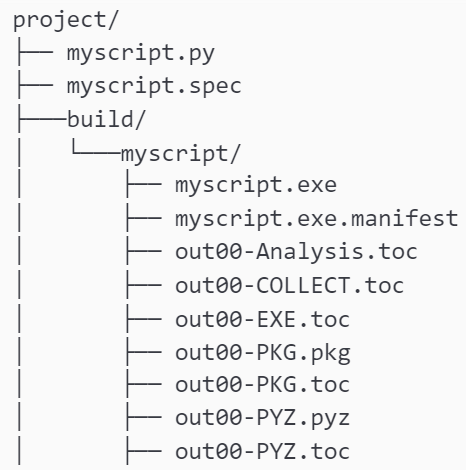
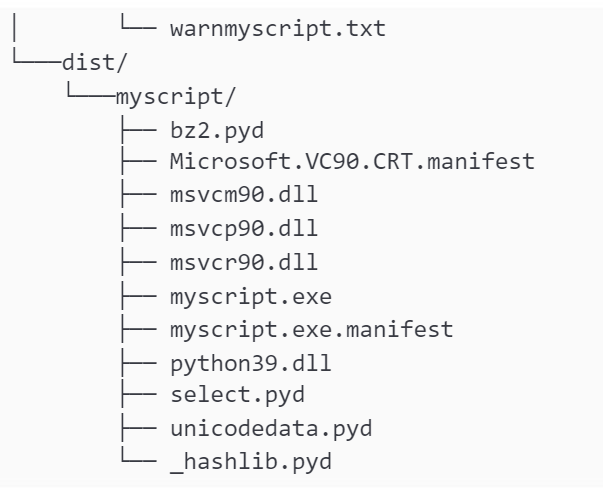


Le répertoire dist/myscript contient l'application construite qui peut maintenant être distribuée aux utilisateurs. Notez que tout le répertoire doit être distribué. Il contient tous les fichiers supplémentaires nécessaires à l'exécution de notre application (DLL, bibliothèques d'extensions compilées, etc.). Une distribution plus compacte peut être obtenue avec le commutateur --onefile de la commande pyinstaller comme suit

    pyinstaller --onefile myscript.py

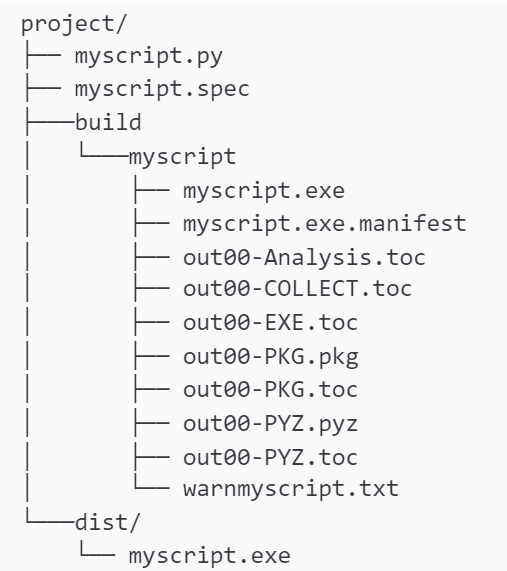

Lorsqu'il est construit avec l'option --onefile, le seul fichier que vous devez distribuer aux autres utilisateurs est l'unique exécutable trouvé dans le répertoire dist (ici, myscript.exe). 

Pour les petites applications, c'est probablement l'option préférée. L'un des effets secondaires de l'exécution de la commande pyinstaller est la création du fichier *.spec. Il s'agit d'un module Python généré automatiquement contenant les spécications sur la façon de créer des exécutables à partir de vos sources. Ceci est l'exemple de fichier de spécification créé automatiquement pour le code myscript.py

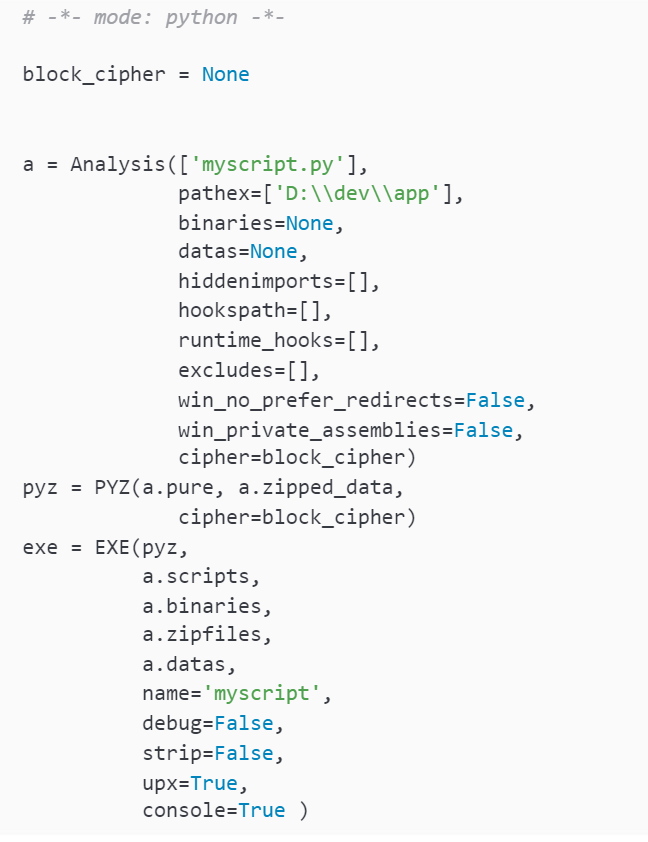

Ce fichier .spec contient tous les arguments pyinstaller spécifiés précédemment. Ceci est très utile si vous avez effectué de nombreuses personnalisations sur votre build. Une fois créé, vous pouvez l'utiliser comme argument de la commande pyinstaller au lieu de votre script Python comme suit

    pyinstaller.exe myscript.spec

Notez qu'il s'agit d'un véritable module Python, vous pouvez donc l'étendre et effectuer des personnalisations plus complexes de la procédure de construction. La personnalisation du fichier .spec est particulièrement utile lorsque vous ciblez de nombreuses plates-formes différentes. 

De plus, toutes les options de pyinstaller ne sont pas disponibles via l'interface de ligne de commande. Le fichier .spec vous permet d'utiliser toutes les fonctionnalités possibles de PyInstaller. PyInstaller est un outil complet, qui convient à la grande majorité des programmes. Quoi qu'il en soit, une lecture approfondie de sa documentation est recommandée si vous souhaitez l'utiliser comme outil pour distribuer vos applications. Jetons un coup d'œil à cx_Freeze dans la section suivante